# Data 330 Applied Time Series Analysis - Final Project
## Right vs Left

Katherine Lannen

last edited: 2021-05-17

***

## 1. Required Packages

**tswge**$^{[1]}$ and **tuneR**$^{[2]}$ need to be installed to successfully run the entire notebook. The first code block below will install tswge and tuneR if you haven't done so before and the second code block will load both packages into your session. 

**Note:** While not a package, to run successfully this notebook requires the associated audio files to be located in the following file path "/content/[specific audio file name].mp3". This notebook uese the mp3 files of the songs Stairway to Heaven by Led Zeppelin$^{[4]}$ and Money by Pink Floyd$^{[5]}$. 

In [ ]:
install.packages("tswge")
install.packages("tuneR", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘PolynomF’, ‘waveslim’, ‘astsa’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pastecs’




In [ ]:
library("tswge")
library("tuneR")

## 2. Introduction  

This notebook explores the concept of stereo sound and its influence in music production. This notebook will explore the use of stereo sound in the songs Stairway to Heaven by Led Zeppelin$^{[4]}$ and Money by Pink Floyd$^{[5]}$ by comparing their left and right audio channels and relating the differences to the stereo effects being employed.

### 2.1 Stereo

Stereo sound is the most common way of recording and listening to audio for the best sound experience. In the 1930s the technical foundations for the recording and playback of two separate audio channels were laid by Alan Blumlein who developed an embossing process for vinyl grooves$^{[9]}$. The first market-ready stereo records were pressed in the 1950s and was the start of two channel sound becoming more widespread from the 1960s onwards$^{[9]}$. Even with all the innovations in audio technology, stereo has remained a constant sound reproduction method. So what is stereo?

Stereophonic sound or stereo is a method of sound reproduction that creates an ilusion of multi-directional audible perspective where you hear sound from various directions like you would with natural hearing$^{[6]}$. Stereo is achieved by using two or more independent audio channels and using two or more speakers$^{[6]}$. However due to the term stereo being tightly coupled with only having two channels (right and left), the term surround sound is more commonly used to refer to 3 or more independent audio channels and speakers$^{[7]}$. Stereo produces the effect of being able to locate the position of a sound source within a space (sound source localization) using a collection of concepts and dimensions.  

The human brain uses several different concepts to localize sounds which stereo systems use. These concepts include timing differences between sounds reaching your left and right ear, sound wave frequency, sound wave pressure levels, dynamic range, and reverberation amount$^{[8]}$. Stereo systems exploit how gullible your brain is to create the “impression” of sound source localization between the system’s speaker$^{[8]}$.

Stereo has three dimensions that can be perceived which form the 3D space of stereo sound: width, height, and depth. The width is controlled by what signals and when those signals play in the speakers which determines where the origin of the signal will be preceived$^{[8]}$. For example when the left and right speaker play the exact same signal, the sound will be preceived as originating directly between the speakers. The height is controlled by the frequency of a sound where high frequency sounds localize themselves above lower frequency sounds$^{[8]}$. The depth is affected by a sound’s relative level, dynamic range, and reverberation amount. Sounds with a weak level and less dynamic range tend to appear toward the back of the stereo field, as do sounds containing excessive reverb$^{[8]}$.

For stereo to achieve the desired effects, not only does the recording and production of the audio have to take into consideration these different dimensions and concepts but the speakers being used to play the audio file has to be set up in a certain way. Stereo audio files can be listened to using a pair of headphones or a stereo playback system. The stereo playback system should be set up in a way that ones head is in an equilateral triangle with the speakers where the speakers are angled 45 degrees towards oneself to achieve the full effect of the stereo sound$^{[8]}$. This set up is important to maintain the original timing differences between sounds reaching your left and right ear and other concepts that produce the illusion of natural hearing.

So what is the future of stereo sound? Stereo as it is typically referred to (2 channels) will remain a prominent sound reproduction method for the forseable future. Surround sound, which is a subsection of the broader/original meaning of stereo, has been upgraded with technologies like the 7.1.4. 3D Surround Sound in the Dolby Atmos format to become 'truly' 3D. This upgraded surround sound format is gaining traction in the music scene, specifically the electronic genre, as the technology in cinema crosses over to music production$^{[7]}$. In this 3D sound format, music producers have even more control of the position in 3D space of individual elements of the music$^{[7]}$. This is made possible using an object-orientated approach where each sound in the mix is assigned to an object which has its own positional metadata$^{[7]}$. This complete control of the position and movement of each sound in 3D space makes it a tool of interest for music production as the technology becomes more affordable. 

### 2.2 Music Production

Stereo sound has influenced the field of music production in how audio is recorded and how audio is consumed. Stereo has been around for decades and is the most prominent sound reproduction method for the best sound experience. A study shown that music enjoyment was increased when stereo sound was detected in the song$^{[11]}$. By enabling recorded sound to be recieved in a multi-directional way, audio and recordings can encorporate another dimension during the recording process. The general mechanics of stereo sound and the different considerations that need to be taken into account were reviewed in section 2.1. In addition to those general mechanics, there are a lot of other techniques used in music production to take advantage of stereo.

Audio panning is one such technique used in music production, this is one of the basic techniques that is used in almost every song to various degrees. Audio panning is a process in audio and music production which is used to position sounds in the left to right spectrum of a stereo image and is made possible by a pan pot or slider that allows you to individually adjust the ratio of levels between the left and right output of a stereo audio signal$^{[10]}$. This technique creates interest, width and a sense of space in a stereo mix by making sounds or instruments appear to come from different places in the left-right spectrum of the stereo field between two speakers$^{[10]}$.

The two songs that were chosen for analysis in the rest of this notebook were selected due to their use of their left and right audio channels. Money by Pink Floyd$^{[5]}$ has this cashier sound effect that has this call and response pattern throughout the song. This sound effect occurs in the left channel and a slightly different sound responds afterwards, this alternation gives a sort of movement to the song. Stairway to Heaven by Led Zeppelin$^{[4]}$ takes a different approach to stereo and instead has two instruments each only play on one of the channels and then has the singers audio come into the 'center', or being played equally on both channels. The analysis of what these effects looks like and how it is represented can be seen throughout the rest of this notebook.


## 3. Methods

### 3.1 Loading the Data

As mentioned in the introduction, this notebook will be using the songs 
Stairway to Heaven by Led Zeppelin$^{[4]}$ and Money by Pink Floyd$^{[5]}$. Both of these songs make use of different effects stereo sound can create as mentioned in section 2.2, please reference this for further information. The summary of the statistics of the two audio files data can be found in section 3.2 of this notebook.

**Note:** These two mp3 audio files must be found in the following relative path for this notebook to run correctly, "/content/Money.mp3" and "/content/Stairway_To_Heaven.mp3". 


To load in both audio files data, the tuneR$^{[2]}$ package was used along with the implementation given in the Analyzing Audio Files notebook$^{[3]}$. Most of the comments in this section are based off of this notebook as well. 

In [ ]:
# Load audio files into the notebook
money_mp3 <- readMP3("/content/Money.mp3")
stairway_mp3 <- readMP3("/content/Stairway_To_Heaven.mp3")

In [ ]:
# Info about the Money audio file
str(money_mp3)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:13609728] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:13609728] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 48000
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


In [ ]:
# Info about the Stairway to Heaven audio file
str(stairway_mp3)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:23154048] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:23154048] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 48000
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


To better visualize the data that is being read in, the tone audio of the file is shown by plotting the pressure values against the time axis limiting the number of samples shown due to the overall number of samples in the file. Both songs are relatively long so the section being analyzed will be filtered to a 10 second frame that contains the stereo effects being analyzed.

In [ ]:
# Money Audio File
# Check audio length (convert seconds to minutes)
num_samples_money <- length(money_mp3@left)
print(num_samples_money / money_mp3@samp.rate / 60)

# Pull the left and right audio channel
money_s1 <- money_mp3@left
money_s2 <- money_mp3@right

# Map amplitudes on range from -1 to 1.
money_m1 <- money_s1 / 2^(money_mp3@bit - 1)
money_m2 <- money_s2 / 2^(money_mp3@bit - 1)

# Create an array containing the time points of the sound
money_time <- (0:(num_samples_money - 1)) / money_mp3@samp.rate

[1] 4.7256


In [ ]:
# Stairway to Heaven Audio File
# Check audio length (convert seconds to minutes)
num_samples_stairway <- length(stairway_mp3@left)
print(num_samples_stairway / stairway_mp3@samp.rate / 60)

# Pull the left and right audio channel
stairway_s1 <- stairway_mp3@left
stairway_s2 <- stairway_mp3@right

# Map amplitudes on range from -1 to 1.
stairway_m1 <- stairway_s1 / 2^(stairway_mp3@bit - 1)
stairway_m2 <- stairway_s2 / 2^(stairway_mp3@bit - 1)

# Create an array containing the time points of the sound
stairway_time <- (0:(num_samples_stairway - 1)) / stairway_mp3@samp.rate

[1] 8.0396


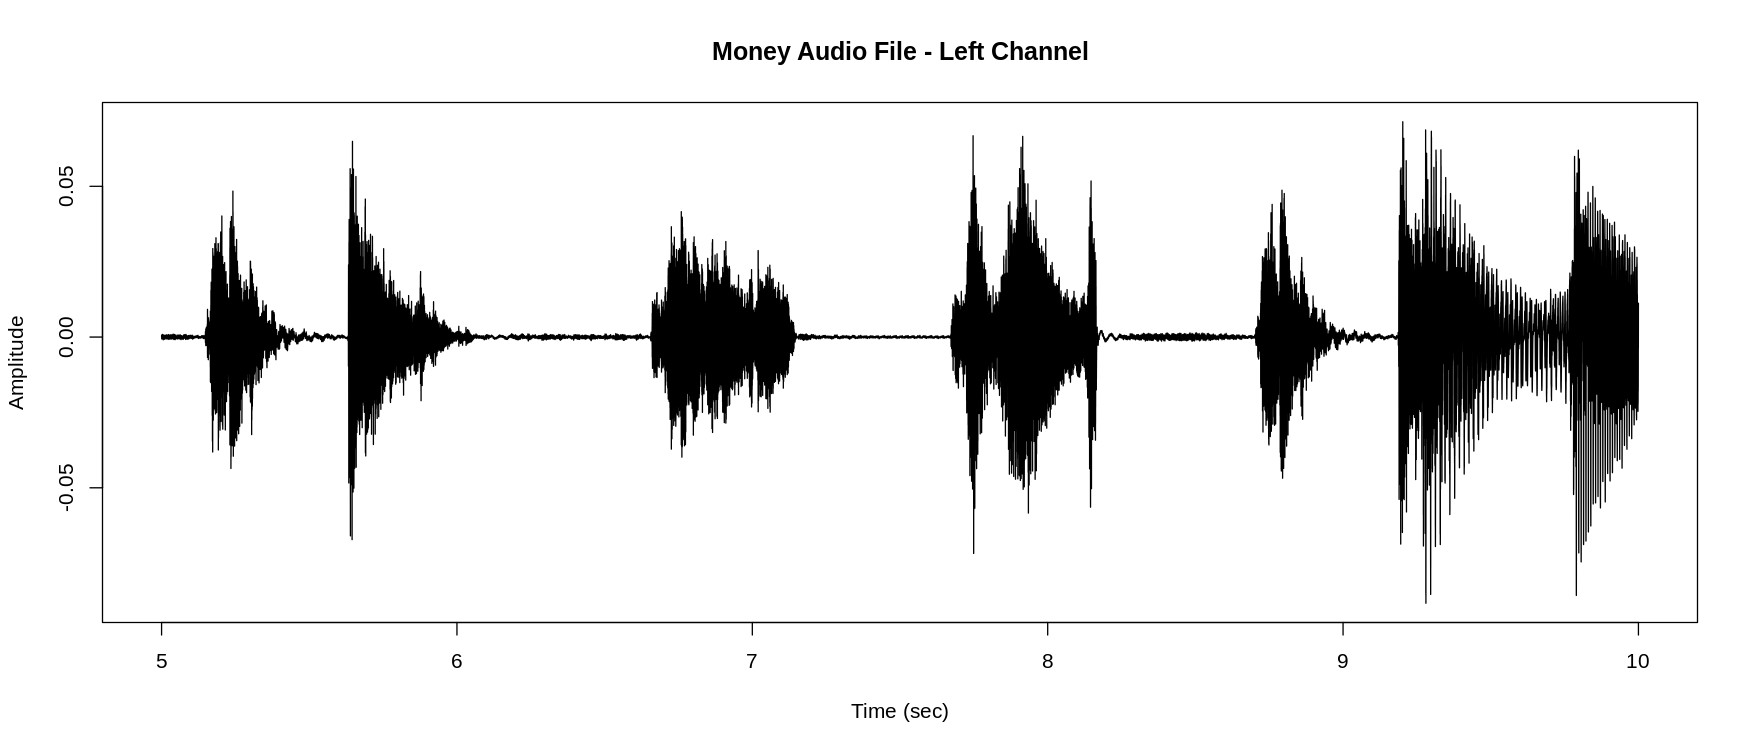

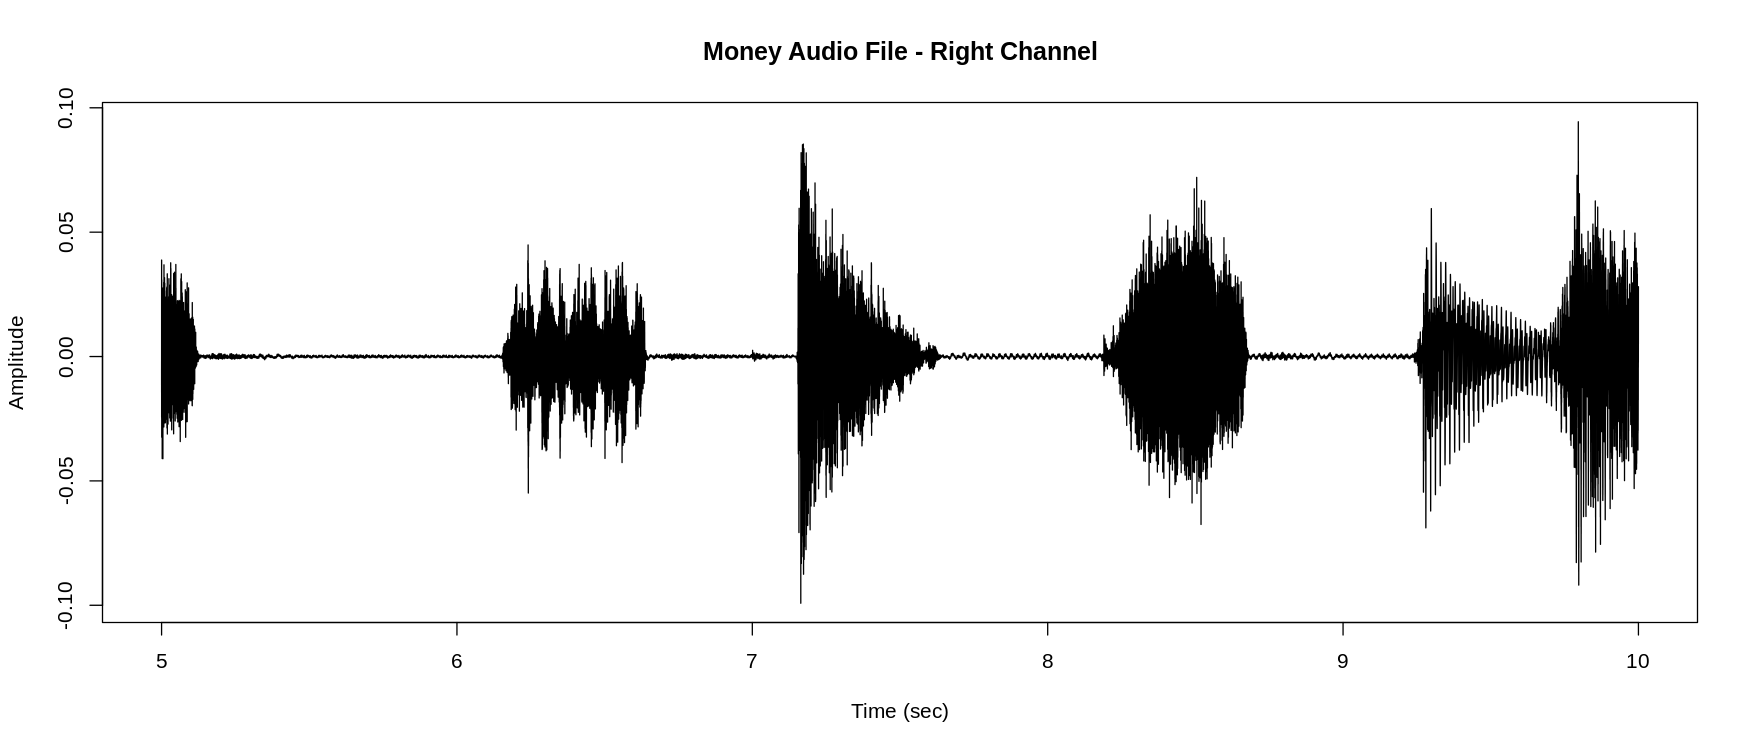

In [ ]:
# Money Audio File
# Plot the tone of the audio file by plotting the pressure values against the time axis
# Because there are 13609728 samples, only a subsection of these samples will be shown
# These will be samples 240000-480000 (or the audio between the first 5 and 10 seconds of the song)

money_m1_filt <- money_m1[240000:480000]
money_m2_filt <- money_m2[240000:480000]
money_time_filt <- money_time[240000:480000]

options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(money_time_filt, money_m1_filt, type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = "Money Audio File - Left Channel")

options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(money_time_filt, money_m2_filt, type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = "Money Audio File - Right Channel")

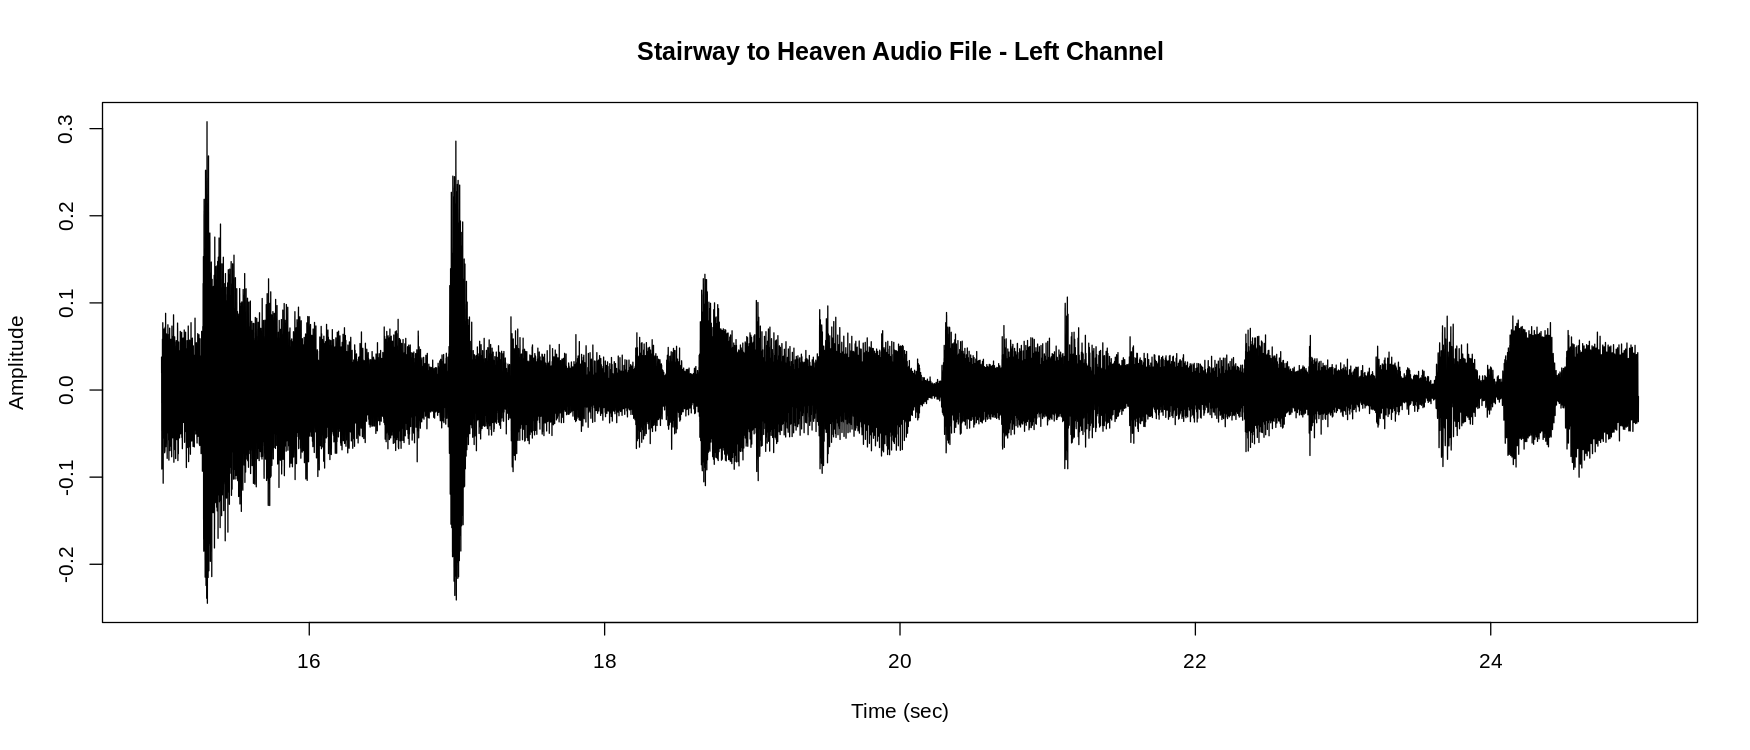

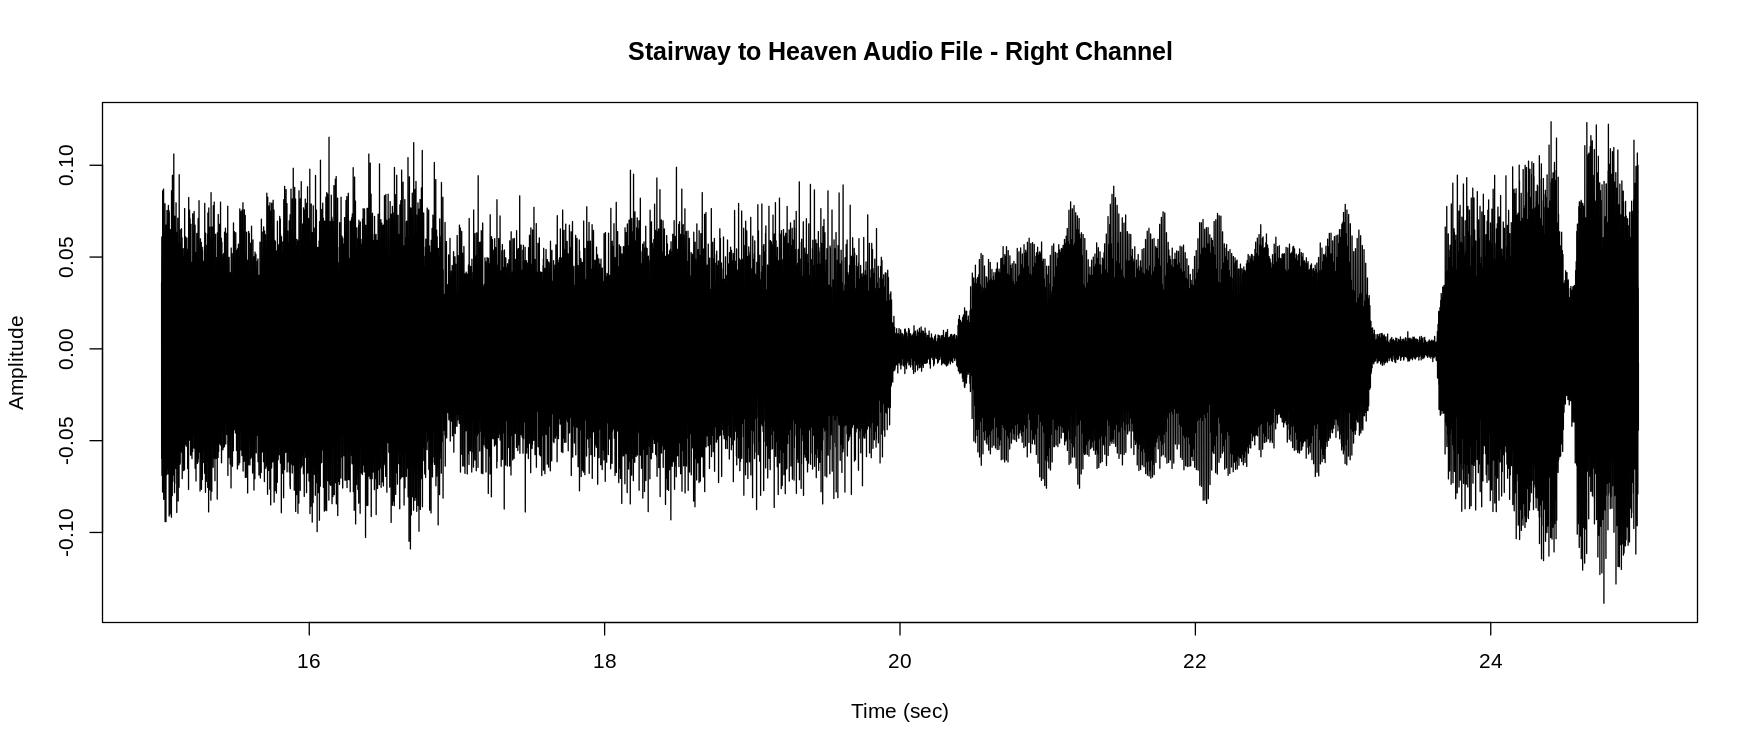

In [ ]:
# Stairway to Heaven Audio File
# Plot the tone of the audio file by plotting the pressure values against the time axis
# Because there are 23154048 samples, only a subsection of these samples will be shown
# These will be samples 720000-1200000 (or the audio between the first 15 and 25 seconds of the song)

stairway_m1_filt <- stairway_m1[720000:1200000]
stairway_m2_filt <- stairway_m2[720000:1200000]
stairway_time_filt <- stairway_time[720000:1200000]

options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(stairway_time_filt, stairway_m1_filt, type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = "Stairway to Heaven Audio File - Left Channel")

options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(stairway_time_filt, stairway_m2_filt, type='l', col='black', xlab='Time (sec)', ylab='Amplitude', main = "Stairway to Heaven Audio File - Right Channel")

The filtered subsections of the songs still have a large number of samples (240,001 for the Money subsection and 480,001 for the Stairway to Heaven subsection). As such, downsampling by 1/1600 the sampling rate will be done to make the process of generating the realizations, autocorrelations, periodograms, and filtering less computationally expensive. One index that states which samples to include in this downsample was created for each song as both the left and right audio channels contain the same number of samples.

In [ ]:
money_index <- seq(1, (length(money_m1_filt) - 1), 30)
stairway_index <- seq(1, (length(stairway_m1_filt) - 1), 30)

### 3.2 Summary Statistics of the Data

The song Money by Pink Floyd has a sampling rate of 48000 Hz and a bit rate of 128 kb/s. There are 13609728 samples in total and the overall length of Money is 4:43.

The song Stairway to Heaven by Led Zeppelin also has a sampling rate of 48000 Hz and a bit rate of 128 kb/s. In this case there are 23154048 samples in total and the overall length of Stairway to Heaven is 8:02.

Both of the audio files have a 16-bit depth. This means that the sound pressure values are mapped to integer values that can range from -2^15 to (2^15)-1$^{[3]}$.

| Song | Artist | Length | Sampling Rate | Number of Samples | Bit Rate | Bit Depth |
| :----: | :----: | :----: | :----: | :----:| :----: | :----: |
| Money | Pink Floyd | 4:43 | 48000 Hz | 13609728 | 128 kb/s | 16 |
| Stairway to Heaven | Led Zeppelin | 8:02 | 48000 Hz | 23154048 | 128 kb/s | 16 |

### 3.3 Filters

Filters add additional contraints to or modifications of the original data. Filtering could involve making a subset from the initial data but in general filters strain something away and/or separate/combine data into different categories, labels, or sections. Filters are commonly used in data science as a tool to automatically take in certain criteria and input and apply a process that produces an altered output that is easier to handle, more relevant to the purpose/scope/topic of the project at hand, and deal with the size and computational cost and complexity at scale. The raw data for both songs have already been filtered once in section 3.1 where the specific time frame for analysis was selected. In the section below the data loaded in section 3.1 will be put through additional filters to isolate the various components in both the right and the left audio channels for the two songs. 

When applying these filters, the main method that this notebook uses is butterworth which is a function implemented in the twsge package. Butterworth is a common linear filter used by scientists and engineers and can be used in several different types of processes. This filter takes in different cutoff points for frequencies and has four main types: low pass, high pass, band pass, and band stop. The order of the Butterworth Filter ($N$) is selected by the user where higher orders have more severe impacts on frequencies that are filtered out and low orders have low impact on spectral density.

Determining the cutoff values for the filters, the type of filter, and the order of the filter took several iterations. This iterative process used the raw data's realization, autocorrelation, and periodogram (section 4.1 for the song Money, and section 4.2 for the song Stairway to Heaven) as a starting point and further narrowed it down from there.

In [ ]:
# Filtering the Left Audio Channel of Money
lmm1_low_pass <- butterworth.wge(money_m1_filt[money_index], 3, type = "low", cutoff = .05, plot = FALSE)

In [ ]:
# Filtering the Right Audio Channel of Money
lmm2_low_pass <- butterworth.wge(money_m2_filt[money_index], 3, type = "low", cutoff = .06, plot = FALSE)

In [ ]:
# Filtering the Left Audio Channel of Stairway to Heaven
rsm1_band_pass <- butterworth.wge(stairway_m1_filt[stairway_index], 3, type = "pass", cutoff = c(0.05,0.15), plot = FALSE)

In [ ]:
# Filtering the Right Audio Channel of Stairway to Heaven
rsm2_band_pass <- butterworth.wge(stairway_m2_filt[stairway_index], 3, type = "pass", cutoff = c(0.25,0.35), plot = FALSE)

## 4. Results

### 4.1 Raw Frequency for Money - Realization, Autocorrelation, and Periodogram

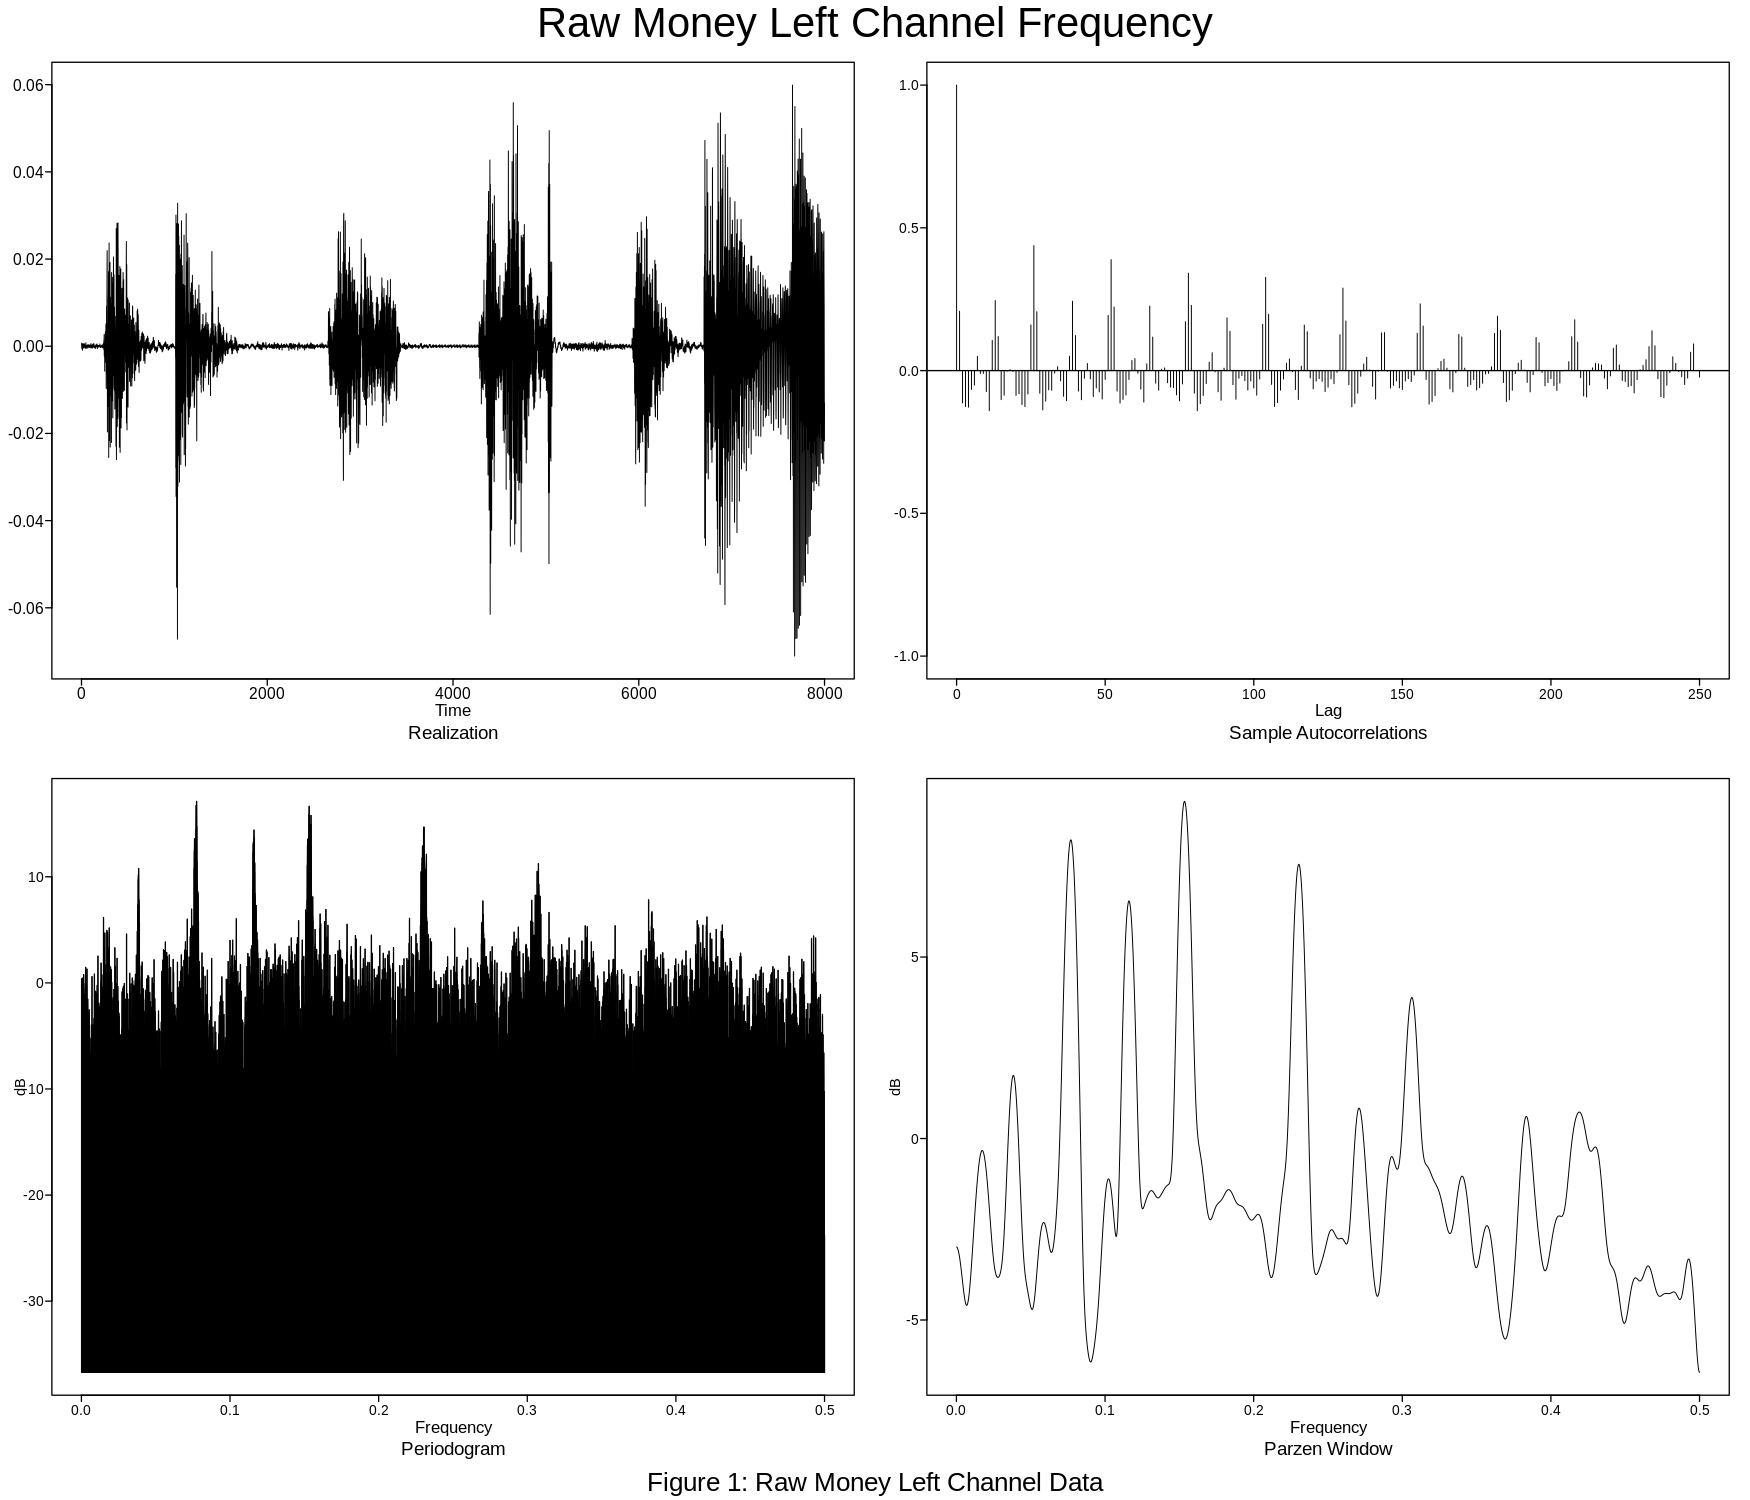

In [ ]:
options(repr.plot.width=14, repr.plot.height=12, repr.plot.res = 125)
par(cex.main =  2, cex.lab = 1.5, cex.axis = 1.5, cex.sub = 1.25, oma=c(1.25,0,2,0))
orig.plots <- plotts.sample.wge(money_m1_filt[money_index], lag.max = 250)
mtext("Raw Money Left Channel Frequency", line=0, side=3, outer=TRUE, cex=2)
mtext("Figure 1: Raw Money Left Channel Data", line=0, side=1, outer=TRUE, cex=1.25)

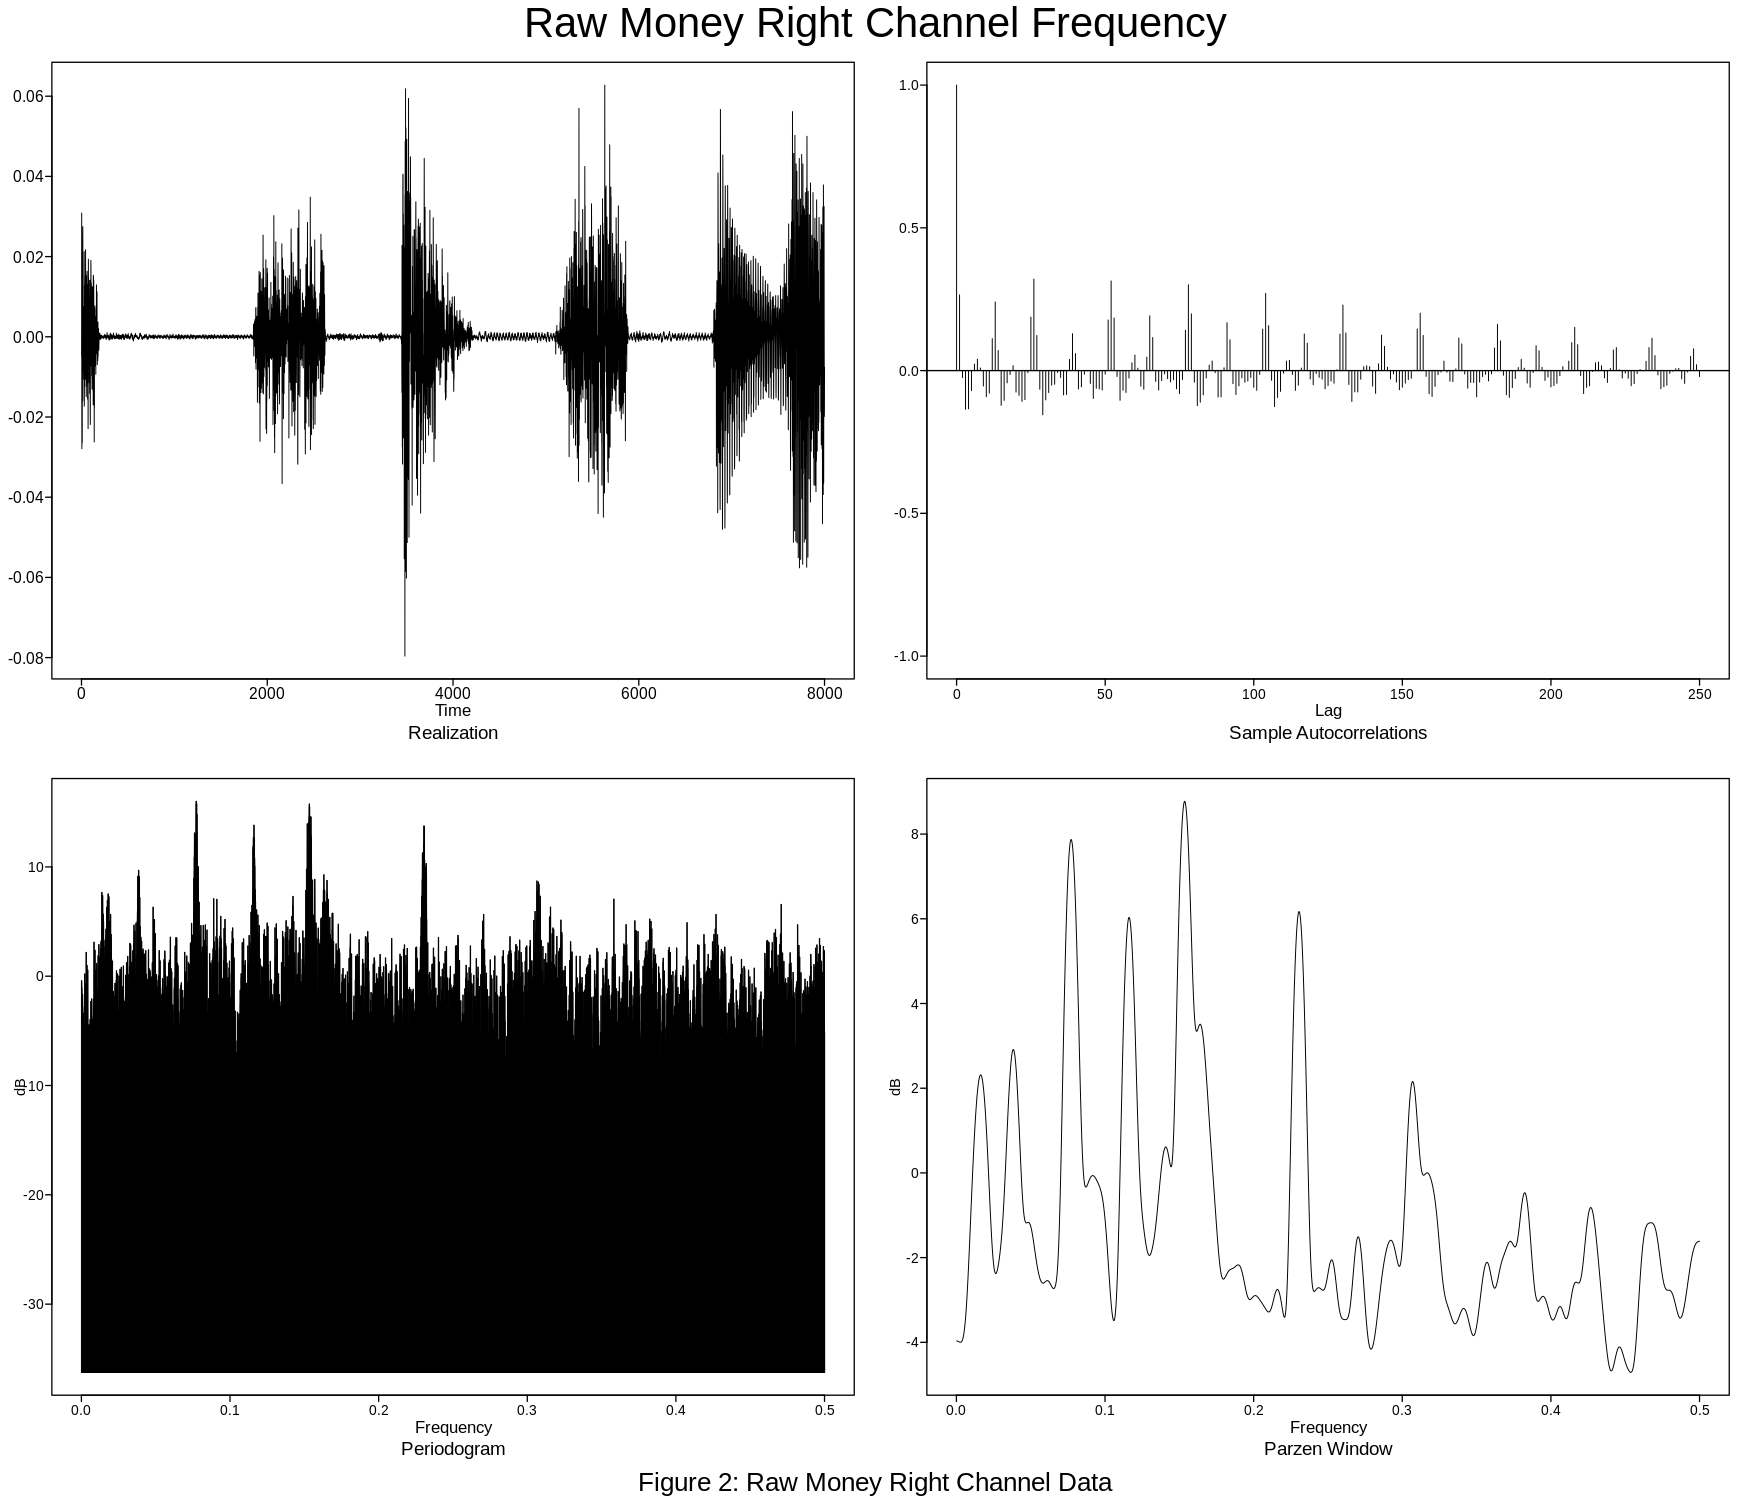

In [ ]:
options(repr.plot.width=14, repr.plot.height=12, repr.plot.res = 125)
par(cex.main =  2, cex.lab = 1.5, cex.axis = 1.5, cex.sub = 1.25, oma=c(1.25,0,2,0))
orig.plots <- plotts.sample.wge(money_m2_filt[money_index], lag.max = 250)
mtext("Raw Money Right Channel Frequency", line=0, side=3, outer=TRUE, cex=2)
mtext("Figure 2: Raw Money Right Channel Data", line=0, side=1, outer=TRUE, cex=1.25)

### 4.2 Raw Frequency for Stairway to Heaven - Realization, Autocorrelation, and Periodogram

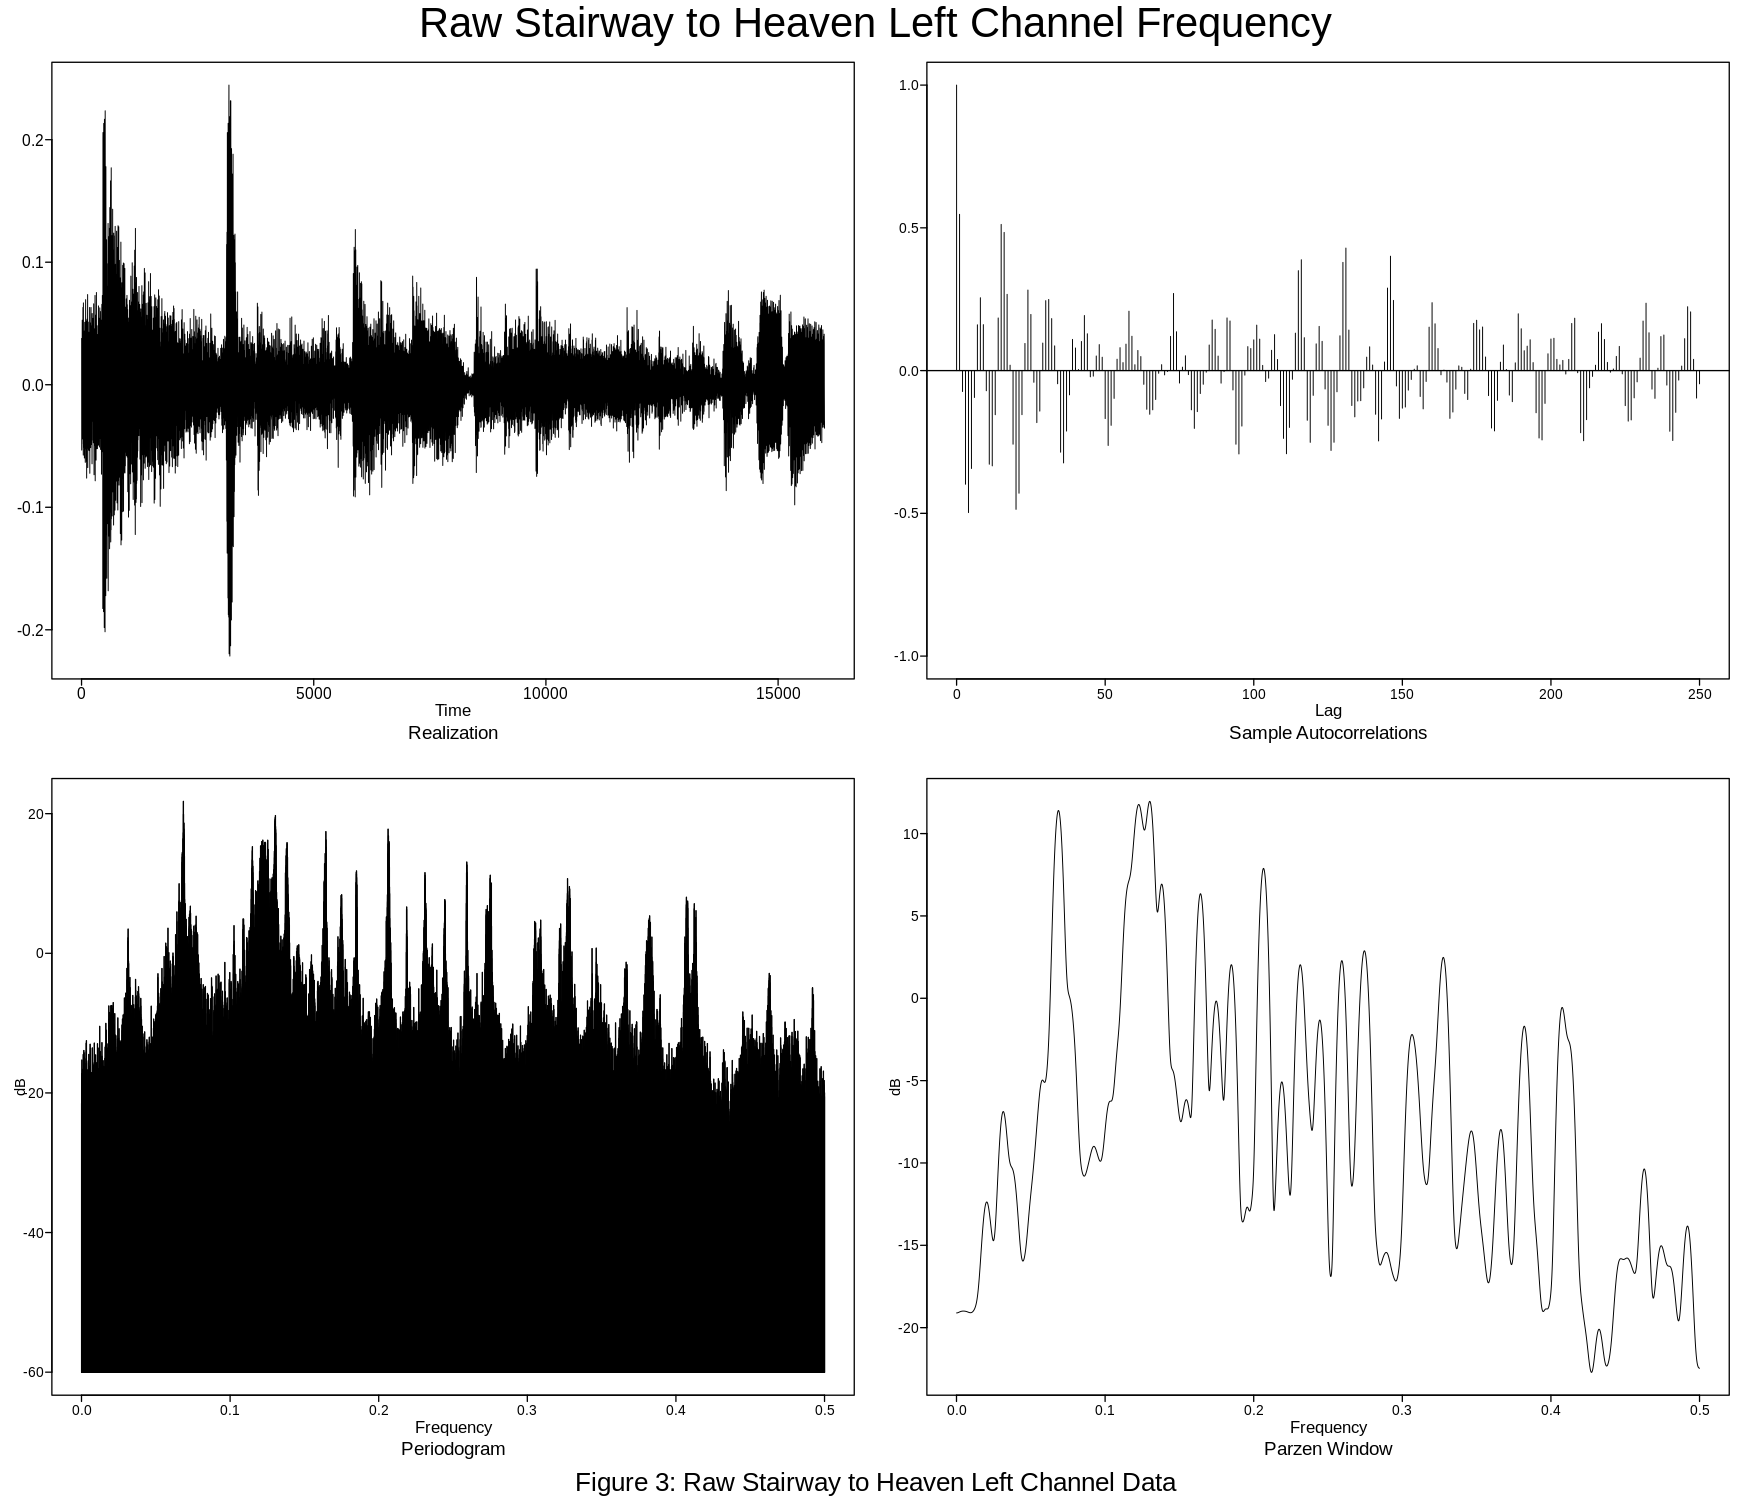

In [ ]:
options(repr.plot.width=14, repr.plot.height=12, repr.plot.res = 125)
par(cex.main =  2, cex.lab = 1.5, cex.axis = 1.5, cex.sub = 1.25, oma=c(1.25,0,2,0))
orig.plots <- plotts.sample.wge(stairway_m1_filt[stairway_index], lag.max = 250)
mtext("Raw Stairway to Heaven Left Channel Frequency", line=0, side=3, outer=TRUE, cex=2)
mtext("Figure 3: Raw Stairway to Heaven Left Channel Data", line=0, side=1, outer=TRUE, cex=1.25)

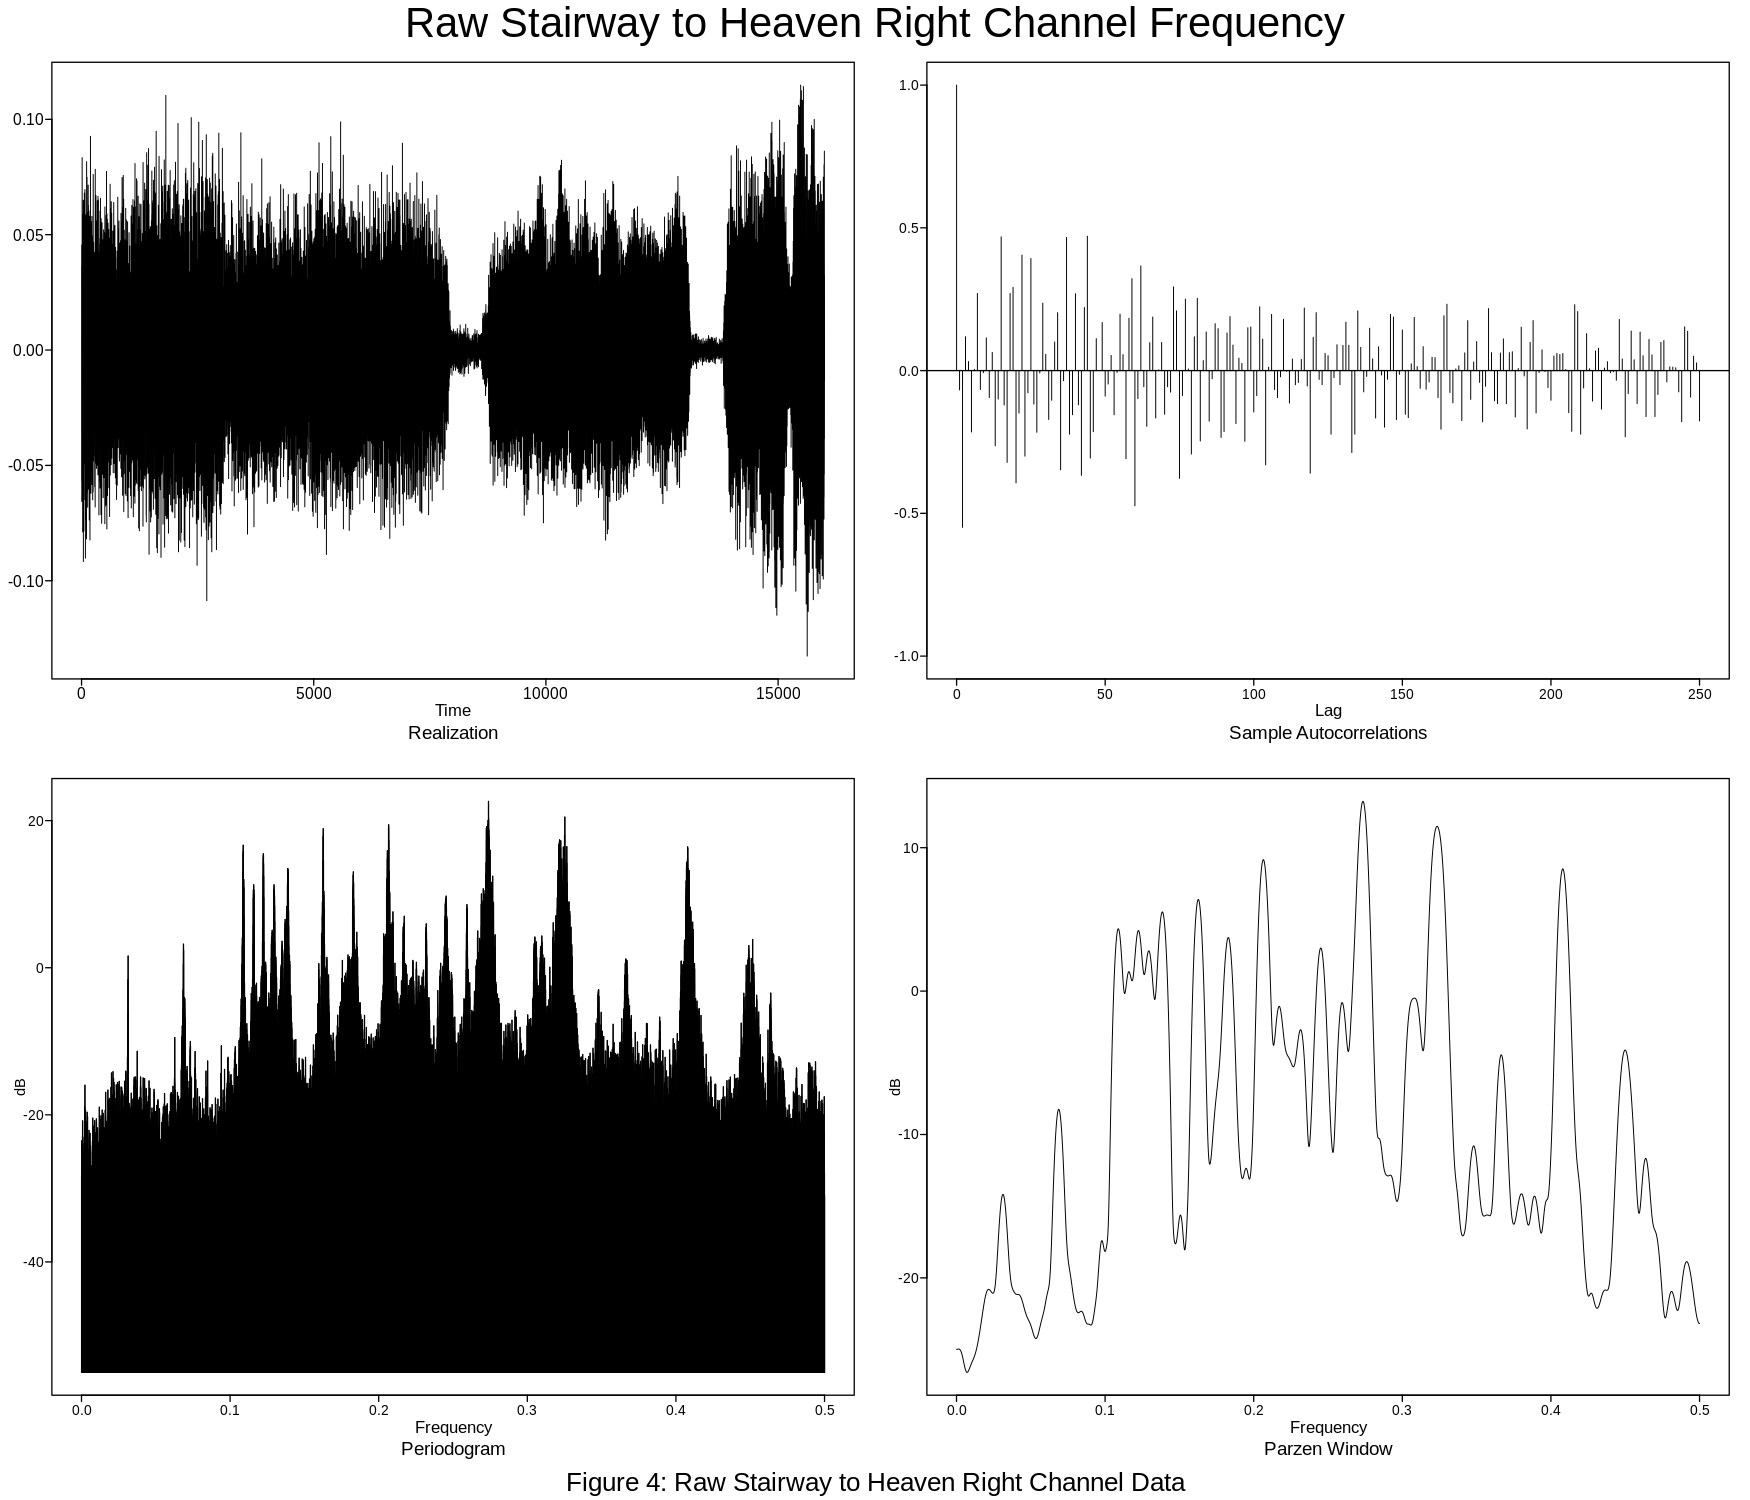

In [ ]:
options(repr.plot.width=14, repr.plot.height=12, repr.plot.res = 125)
par(cex.main =  2, cex.lab = 1.5, cex.axis = 1.5, cex.sub = 1.25, oma=c(1.25,0,2,0))
orig.plots <- plotts.sample.wge(stairway_m2_filt[stairway_index], lag.max = 250)
mtext("Raw Stairway to Heaven Right Channel Frequency", line=0, side=3, outer=TRUE, cex=2)
mtext("Figure 4: Raw Stairway to Heaven Right Channel Data", line=0, side=1, outer=TRUE, cex=1.25)

### 4.3 Filtered Frequency for Money

#### 4.3.1 Left Audio Channel - Realization, Autocorrelation, and Periodogram

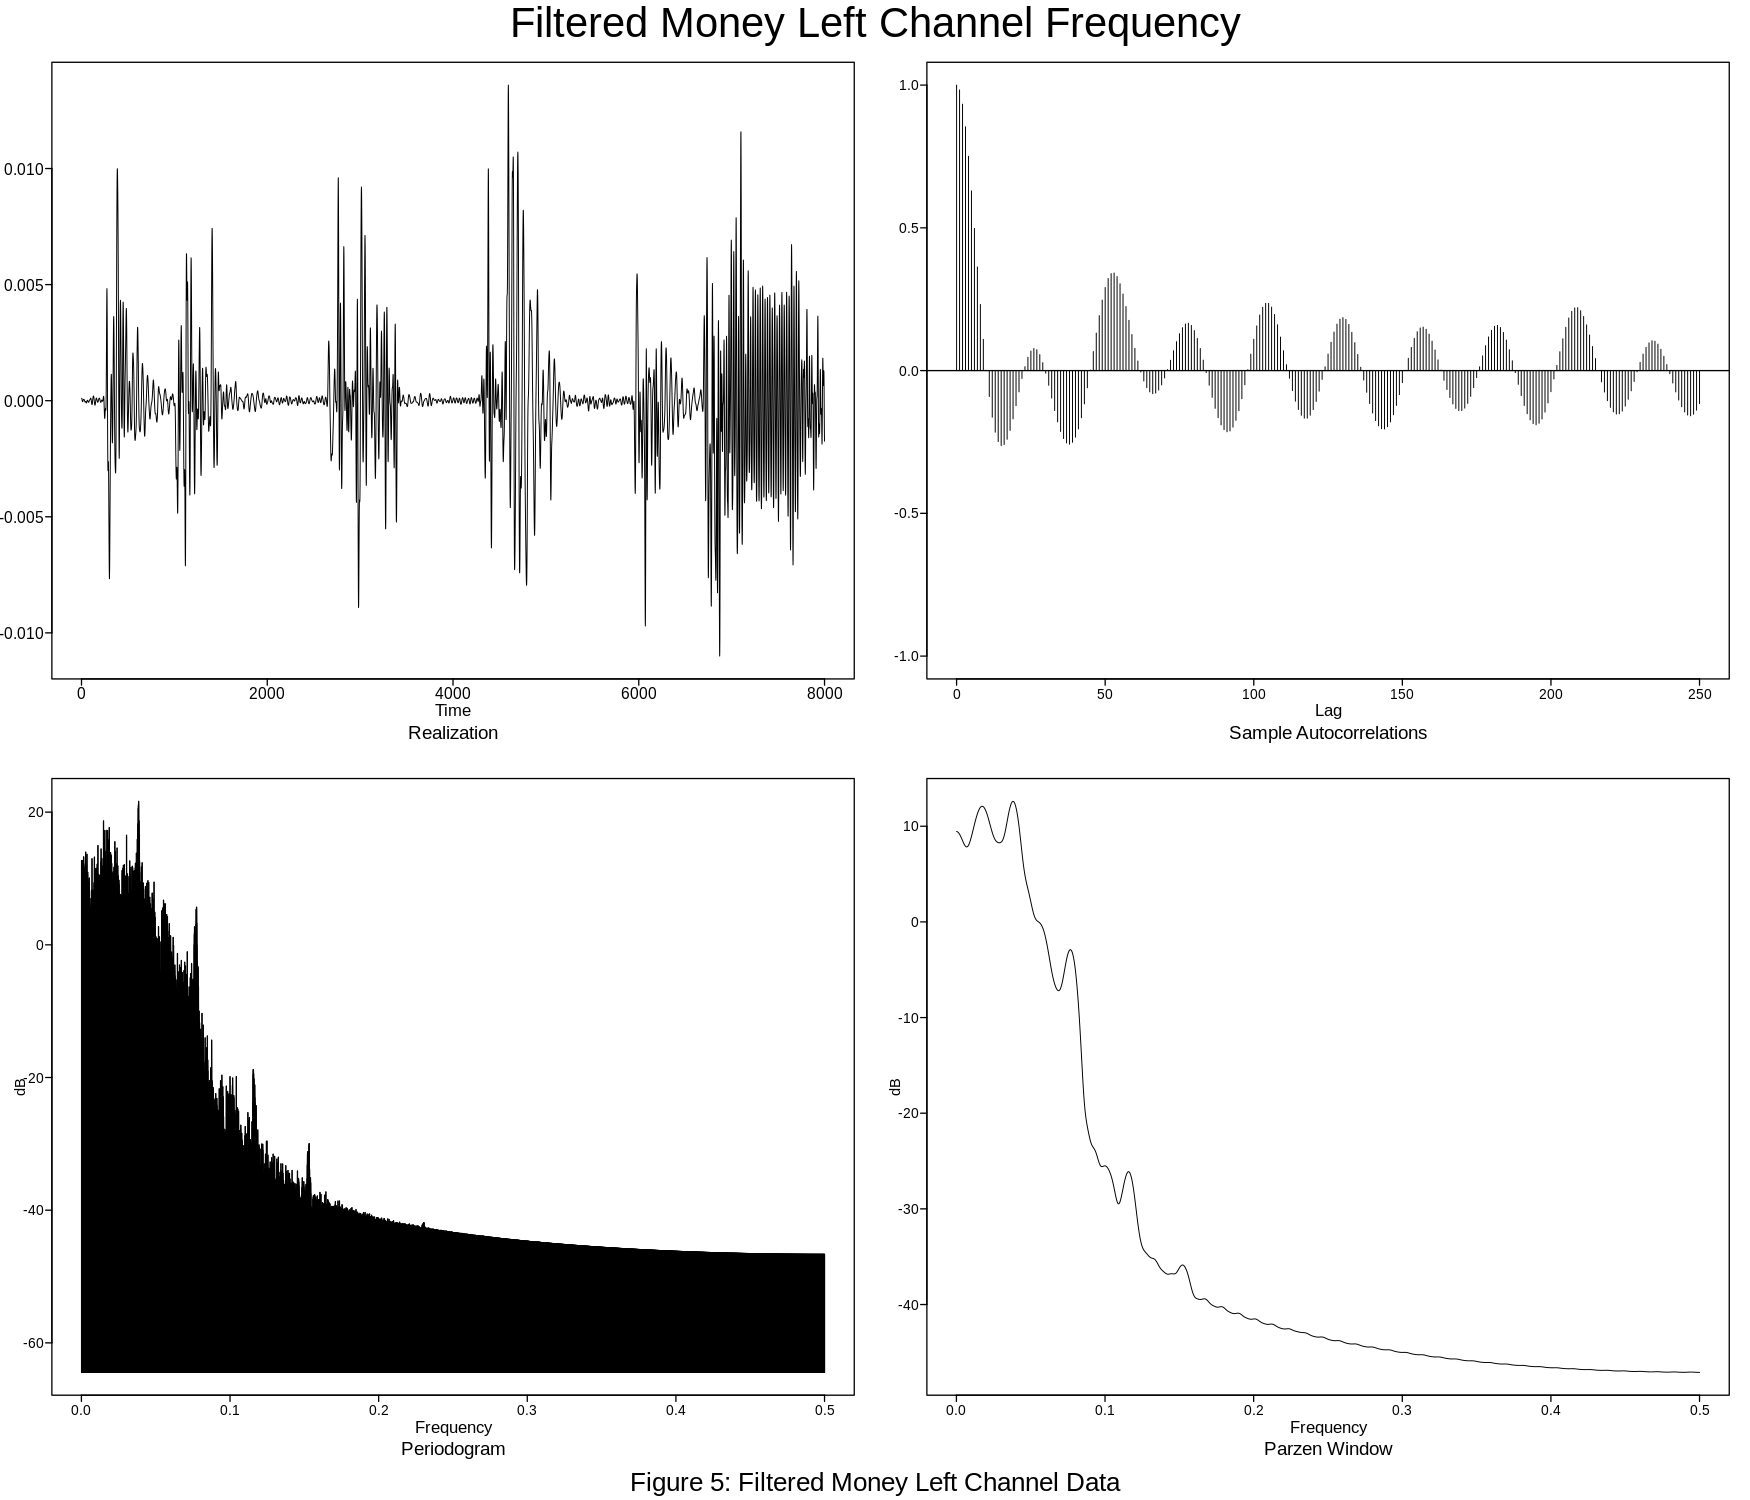

In [ ]:
options(repr.plot.width=14, repr.plot.height=12, repr.plot.res = 125)
par(cex.main =  2, cex.lab = 1.5, cex.axis = 1.5, cex.sub = 1.25, oma=c(1.25,0,2,0))
orig.plots <- plotts.sample.wge(lmm1_low_pass$x.filt, lag.max = 250)
mtext("Filtered Money Left Channel Frequency", line=0, side=3, outer=TRUE, cex=2)
mtext("Figure 5: Filtered Money Left Channel Data", line=0, side=1, outer=TRUE, cex=1.25)

In [ ]:
lmm1_periodogram <- period.wge(lmm1_low_pass$x.filt, plot = FALSE)

f1 <- lmm1_periodogram$freq[which.max(lmm1_periodogram$pgram)]
cat("Filtered Money Left Channel Dominant Frequency: ", f1, "\n")
cat("Filtered Money Left Channel Period: ", 1/f1, "\n")

Filtered Money Left Channel Dominant Frequency:  0.0385 
Filtered Money Left Channel Period:  25.97403 


#### 4.3.2 Right Audio Channel - Realization, Autocorrelation, and Periodogram

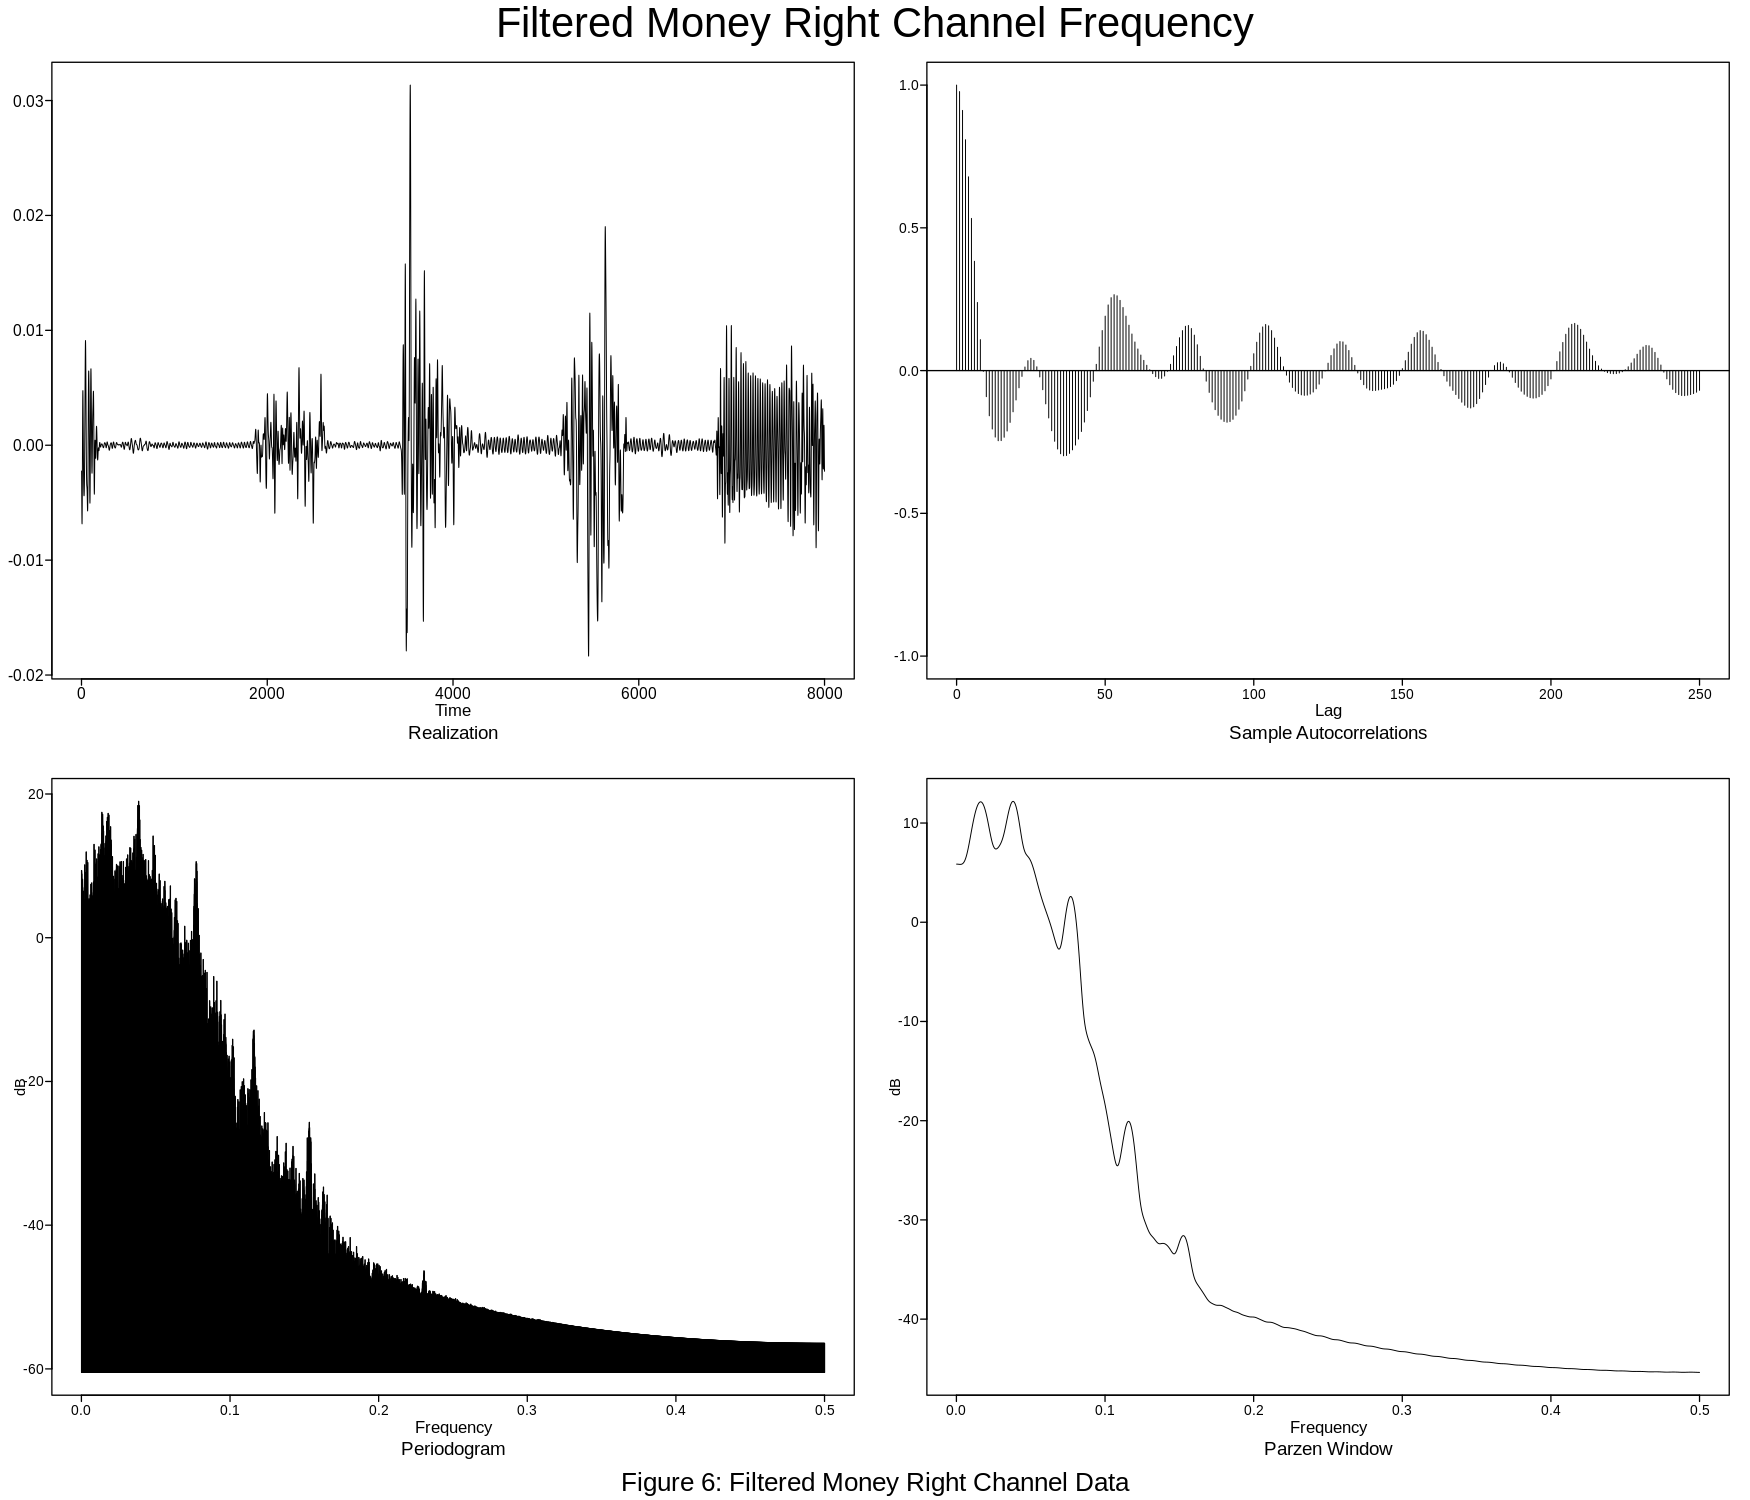

In [ ]:
options(repr.plot.width=14, repr.plot.height=12, repr.plot.res = 125)
par(cex.main =  2, cex.lab = 1.5, cex.axis = 1.5, cex.sub = 1.25, oma=c(1.25,0,2,0))
orig.plots <- plotts.sample.wge(lmm2_low_pass$x.filt, lag.max = 250)
mtext("Filtered Money Right Channel Frequency", line=0, side=3, outer=TRUE, cex=2)
mtext("Figure 6: Filtered Money Right Channel Data", line=0, side=1, outer=TRUE, cex=1.25)

In [ ]:
lmm2_periodogram <- period.wge(lmm2_low_pass$x.filt, plot = FALSE)

f1 <- lmm2_periodogram$freq[which.max(lmm2_periodogram$pgram)]
cat("Filtered Money Right Channel Dominant Frequency: ", f1, "\n")
cat("Filtered Money Right Channel Period: ", 1/f1, "\n")

Filtered Money Right Channel Dominant Frequency:  0.0385 
Filtered Money Right Channel Period:  25.97403 


#### 4.3.3 Left and Right Audio Channel - Realization

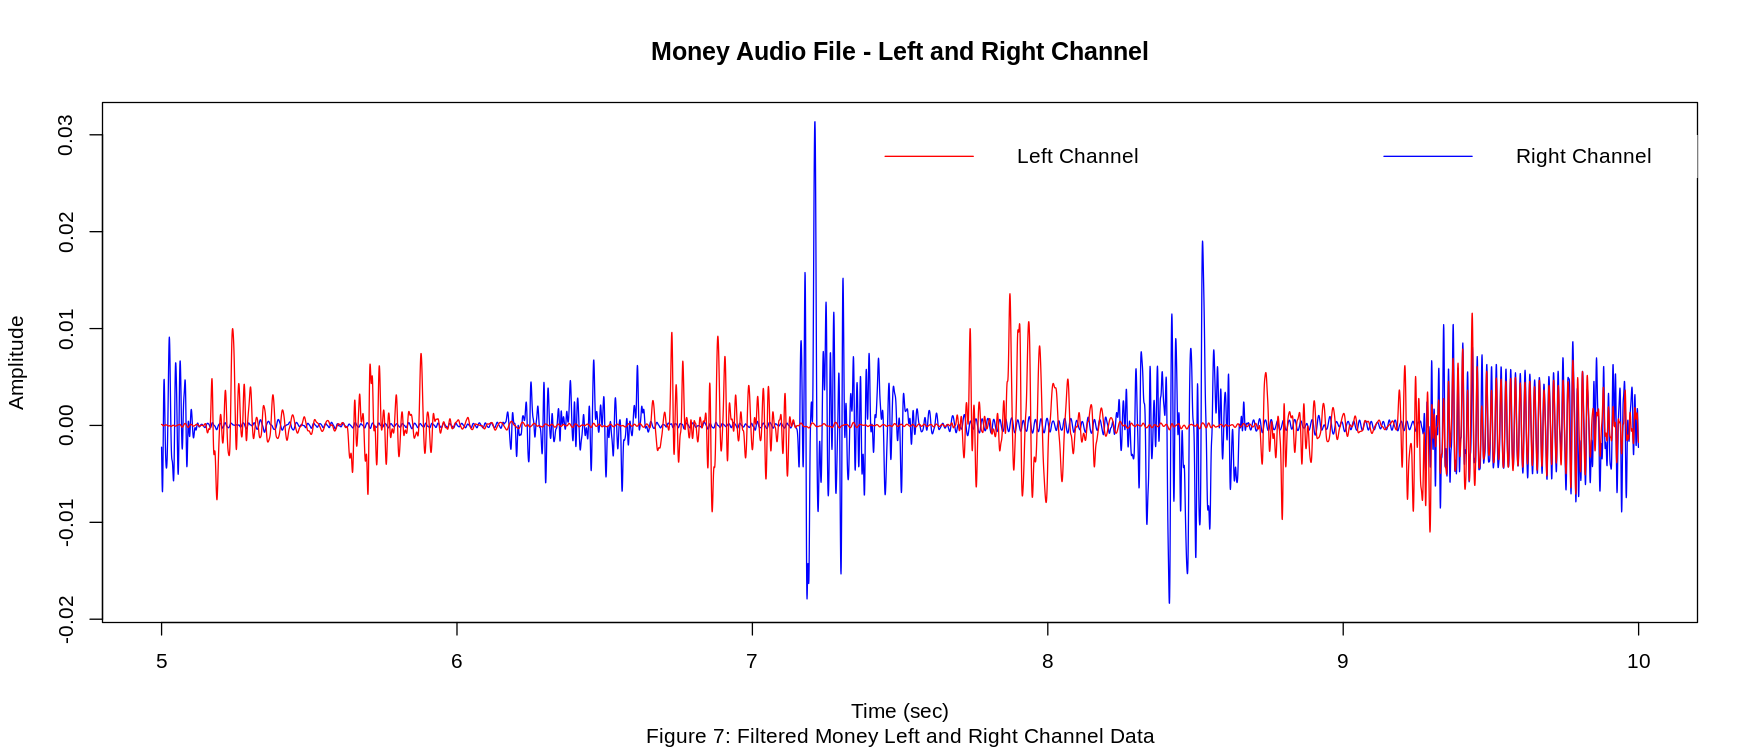

In [ ]:
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(money_time_filt[money_index], lmm2_low_pass$x.filt, type='l', col='blue', xlab='Time (sec)', ylab='Amplitude', main = "Money Audio File - Left and Right Channel",
sub = "Figure 7: Filtered Money Left and Right Channel Data")
lines(money_time_filt[money_index], lmm1_low_pass$x.filt, type='l', col='red')
legend(7.3, 0.03, legend=c("Left Channel", "Right Channel"),
       col=c("red", "blue"), lty=1, cex = 1, horiz=TRUE, box.lty=0)

### 4.4 Filtered Frequency for Stairway to Heaven

#### 4.4.1 Left Audio Channel - Realization, Autocorrelation, and Periodogram

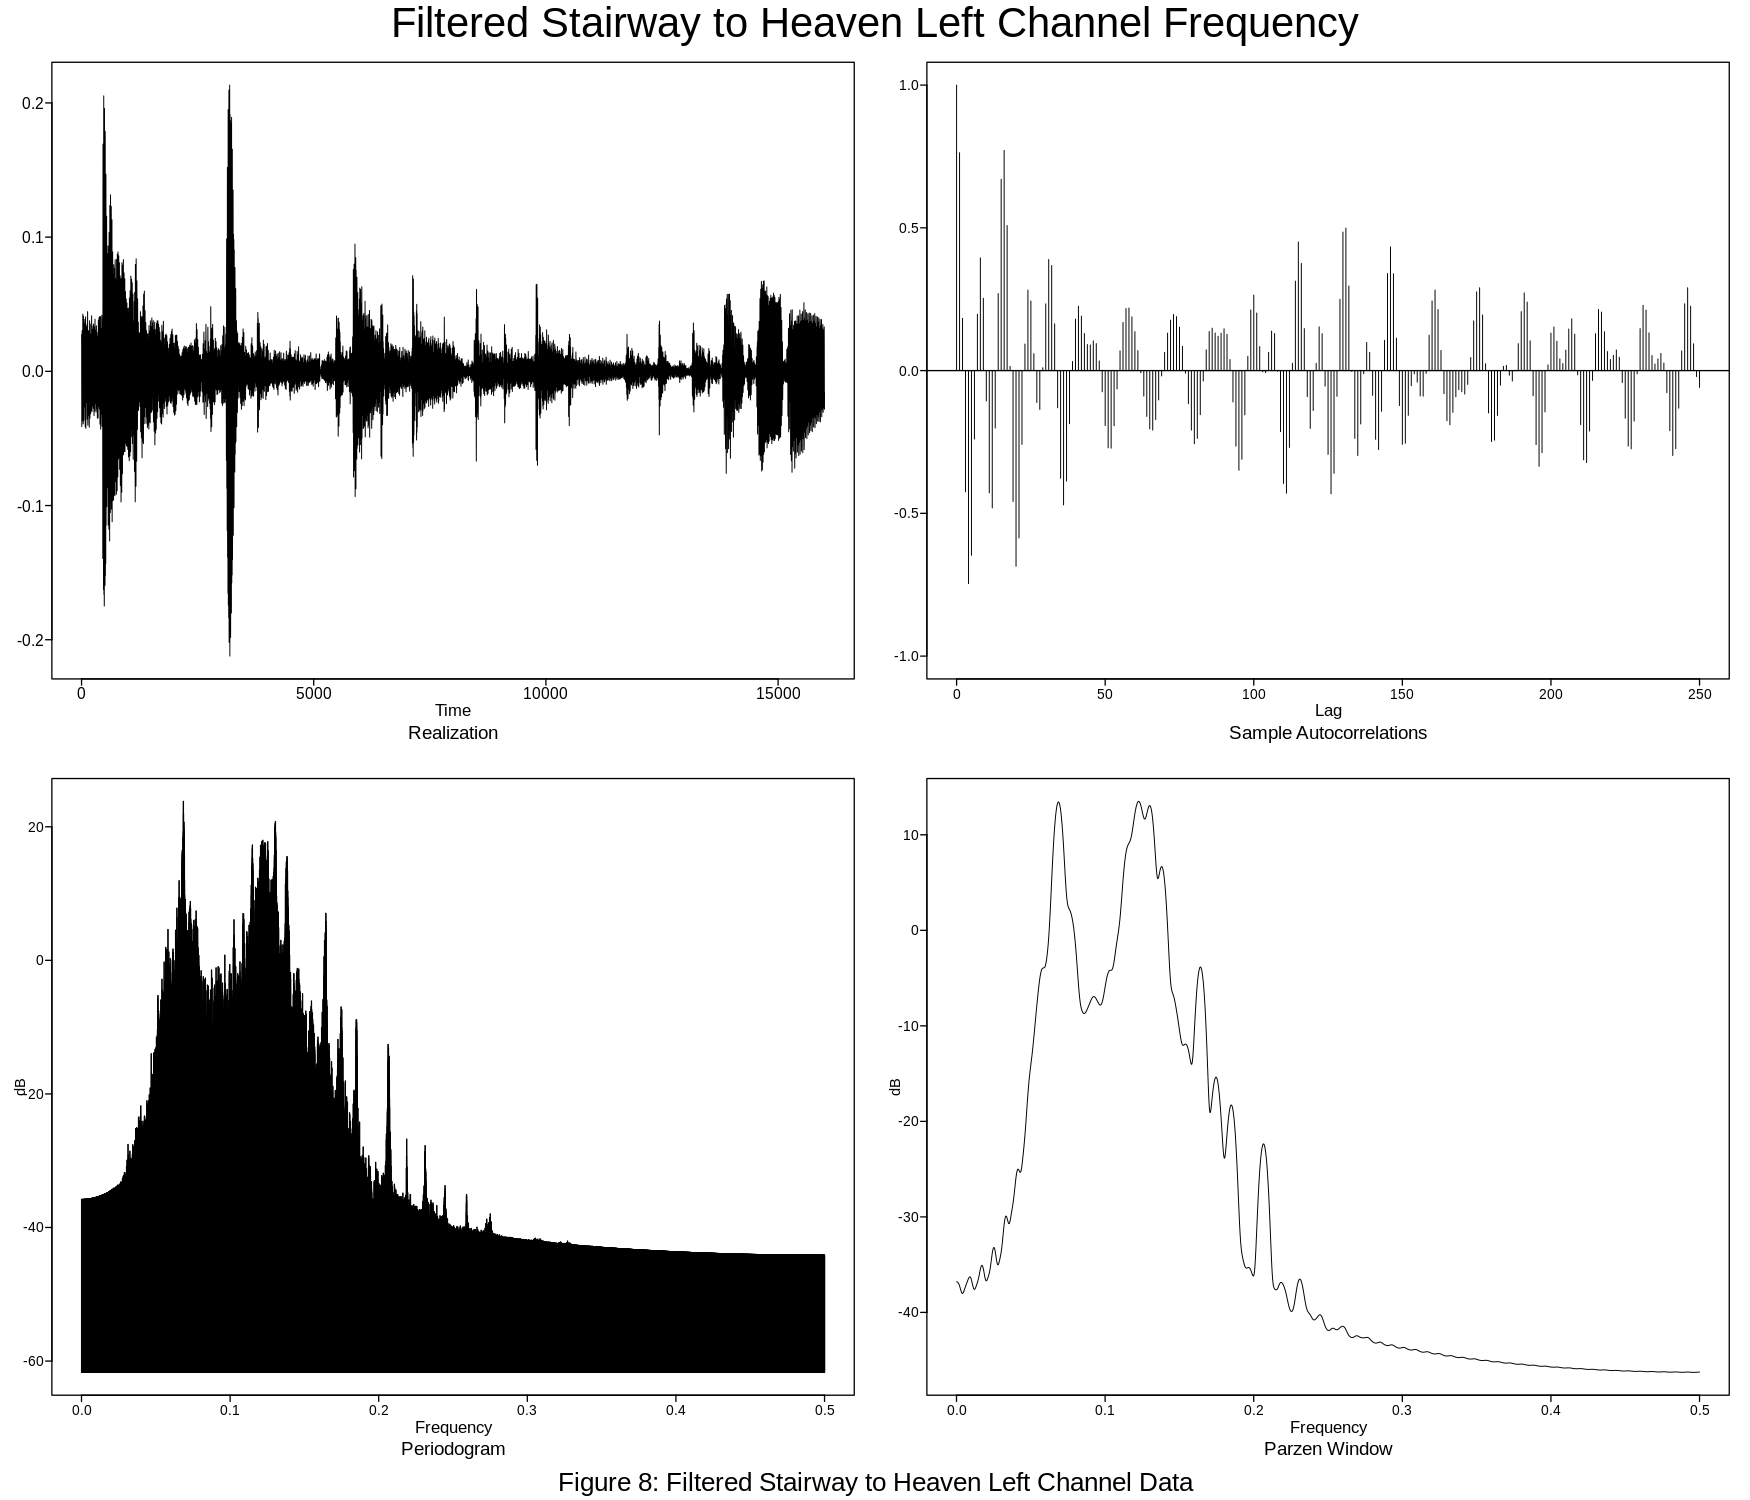

In [ ]:
options(repr.plot.width=14, repr.plot.height=12, repr.plot.res = 125)
par(cex.main =  2, cex.lab = 1.5, cex.axis = 1.5, cex.sub = 1.25, oma=c(1.25,0,2,0))
orig.plots <- plotts.sample.wge(rsm1_band_pass$x.filt, lag.max = 250)
mtext("Filtered Stairway to Heaven Left Channel Frequency", line=0, side=3, outer=TRUE, cex=2)
mtext("Figure 8: Filtered Stairway to Heaven Left Channel Data", line=0, side=1, outer=TRUE, cex=1.25)

In [ ]:
rsm1_periodogram <- period.wge(rsm1_band_pass$x.filt, plot = FALSE)

f1 <- rsm1_periodogram$freq[which.max(rsm1_periodogram$pgram)]
cat("Filtered Stairway to Heaven Left Channel Dominant Frequency: ", f1, "\n")
cat("Filtered Stairway to Heaven Left Channel Period: ", 1/f1, "\n")

Filtered Stairway to Heaven Left Channel Dominant Frequency:  0.0685625 
Filtered Stairway to Heaven Left Channel Period:  14.58523 


#### 4.4.2 Right Audio Channel - Realization, Autocorrelation, and Periodogram

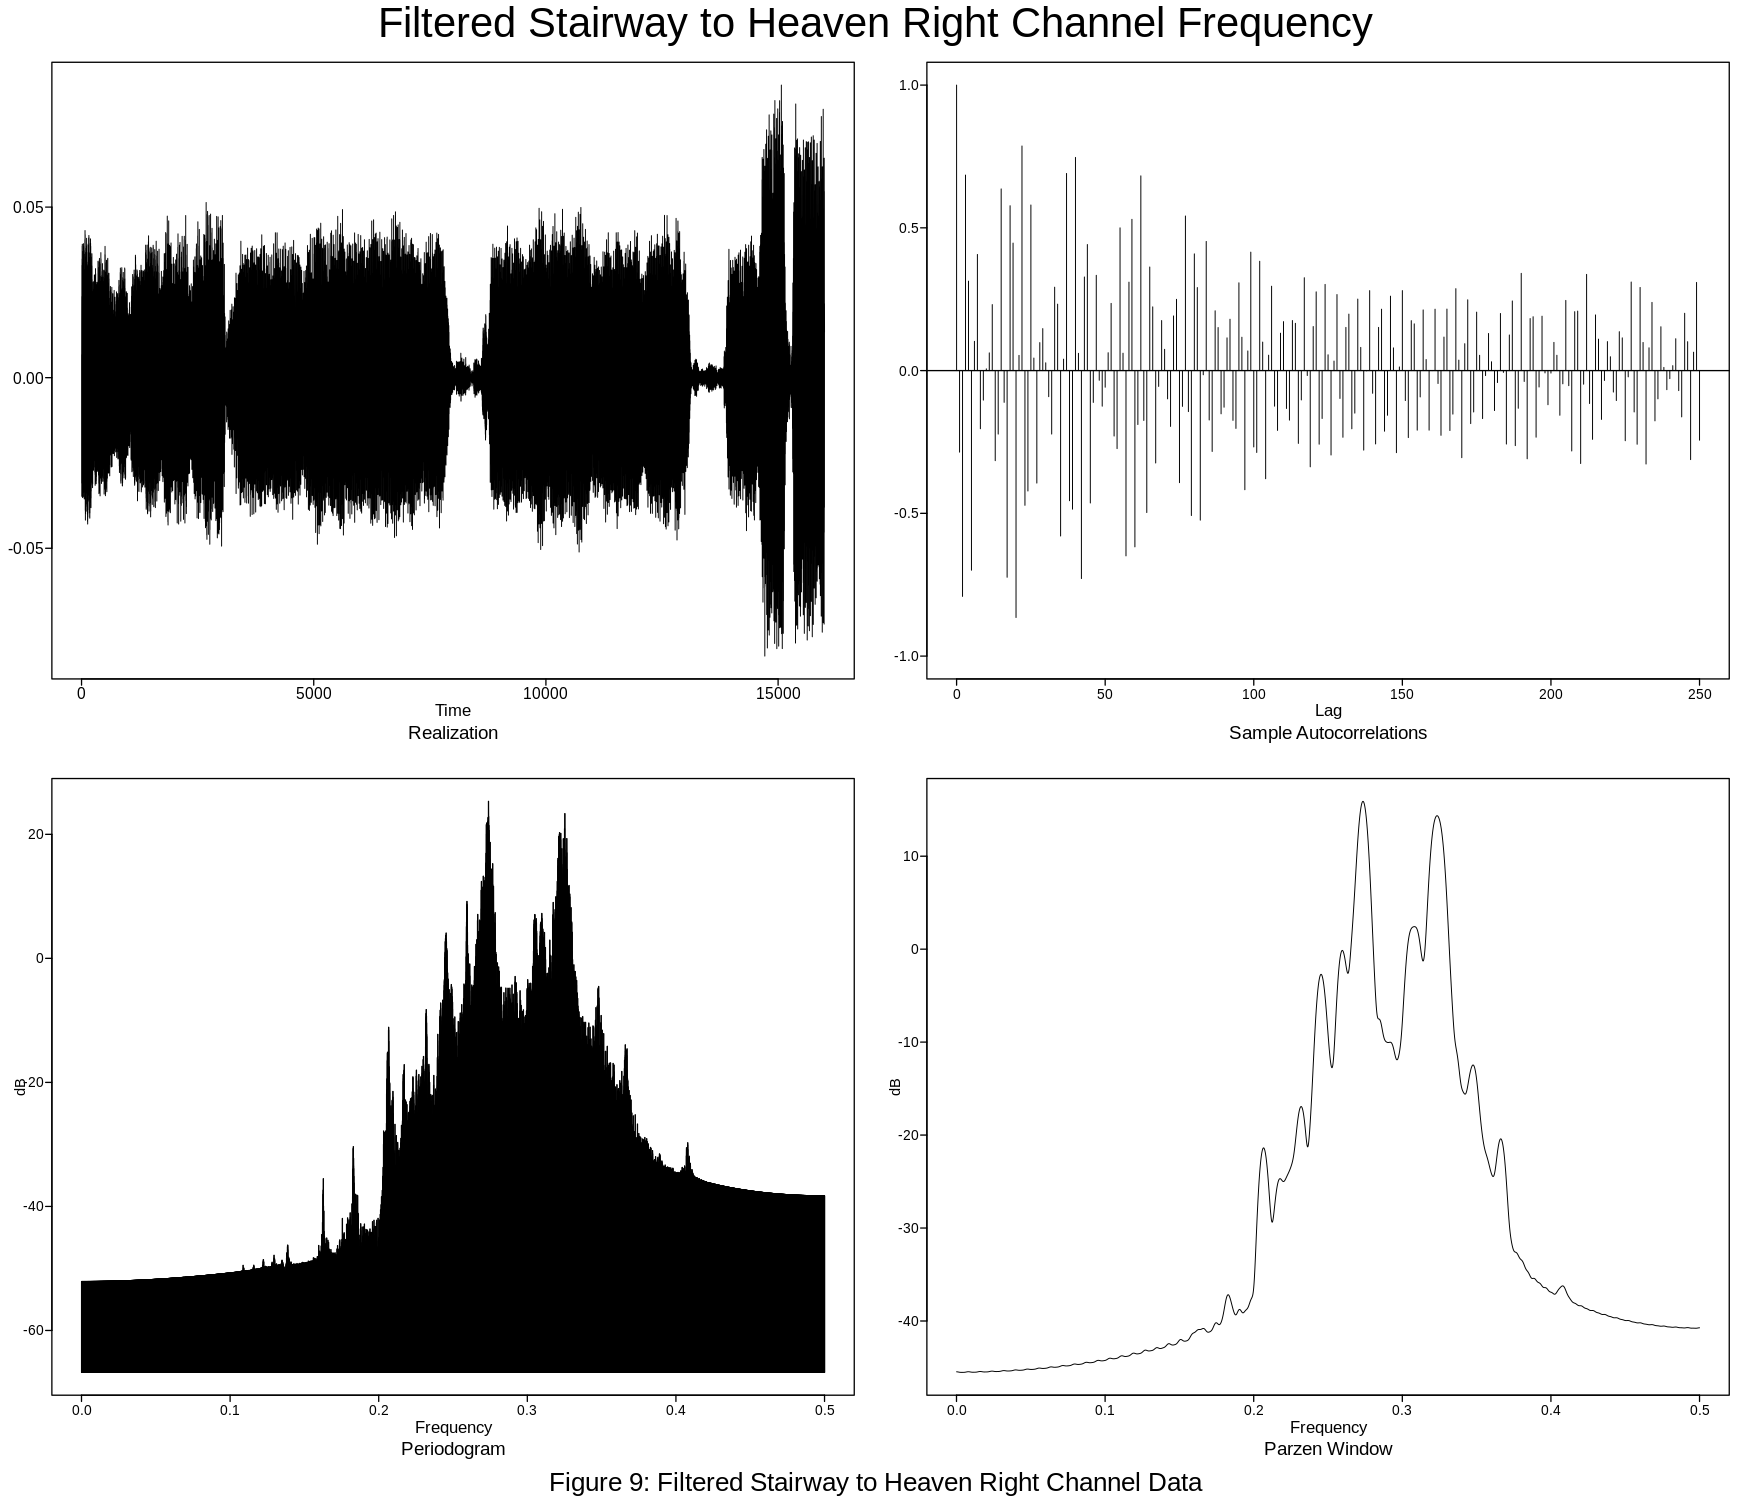

In [ ]:
options(repr.plot.width=14, repr.plot.height=12, repr.plot.res = 125)
par(cex.main =  2, cex.lab = 1.5, cex.axis = 1.5, cex.sub = 1.25, oma=c(1.25,0,2,0))
orig.plots <- plotts.sample.wge(rsm2_band_pass$x.filt, lag.max = 250)
mtext("Filtered Stairway to Heaven Right Channel Frequency", line=0, side=3, outer=TRUE, cex=2)
mtext("Figure 9: Filtered Stairway to Heaven Right Channel Data", line=0, side=1, outer=TRUE, cex=1.25)

In [ ]:
rsm2_periodogram <- period.wge(rsm2_band_pass$x.filt, plot = FALSE)

f1 <- rsm2_periodogram$freq[which.max(rsm2_periodogram$pgram)]
cat("Filtered Stairway to Heaven Right Channel Dominant Frequency: ", f1, "\n")
cat("Filtered Stairway to Heaven Right Channel Period: ", 1/f1, "\n")

Filtered Stairway to Heaven Right Channel Dominant Frequency:  0.273875 
Filtered Stairway to Heaven Right Channel Period:  3.651301 


#### 4.4.3 Left and Right Audio Channel - Realization

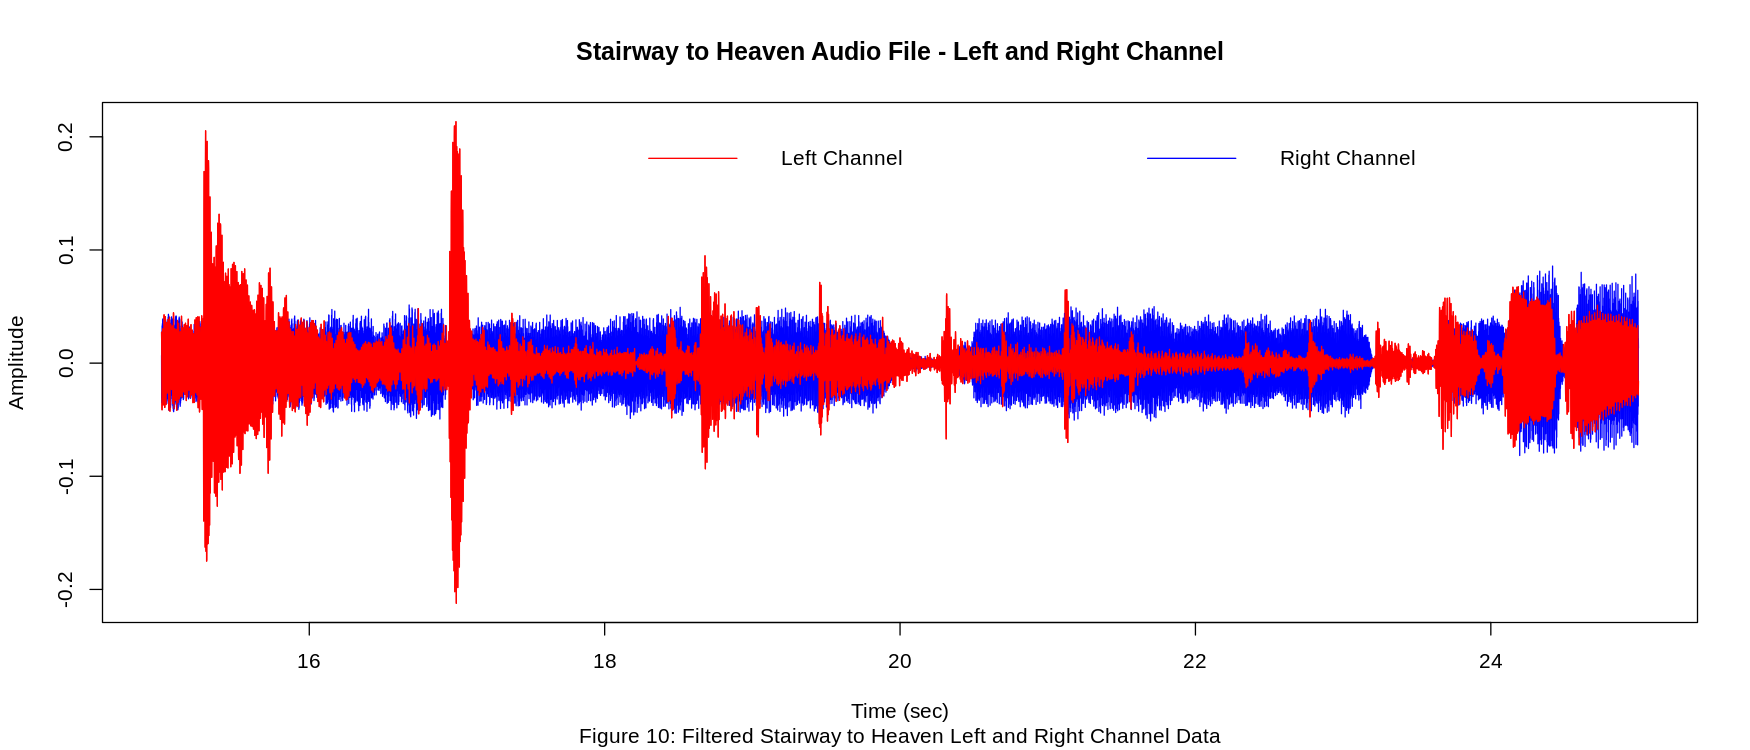

In [ ]:
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(stairway_time_filt[stairway_index], rsm1_band_pass$x.filt, type='l', col='red', xlab='Time (sec)', ylab='Amplitude', main = "Stairway to Heaven Audio File - Left and Right Channel",
sub = "Figure 10: Filtered Stairway to Heaven Left and Right Channel Data")
lines(stairway_time_filt[stairway_index], rsm2_band_pass$x.filt, type='l', col='blue')
lines(stairway_time_filt[stairway_index], rsm1_band_pass$x.filt, type='l', col='red')
legend(18, 0.2, legend=c("Left Channel", "Right Channel"),
       col=c("red", "blue"), lty=1, cex = 1, horiz=TRUE, box.lty=0)

## 5. Discussion and Conclusions 

For this notebook, stereo sound and music production were explored in section 2.1 and 2.2 from there the songs Stairway to Heaven by Led Zeppelin$^{[4]}$ and Money by Pink Floyd$^{[5]}$ were loaded and processed so that their left and right audio channels were separated. This was done so that the left and right audio channels could be compared to see how different stereo effects were employed.

As mentioned in section 3.1 and 3.3, both of the songs were long and had a large number of samples. As such 10 second subsections of each song were chosen that contained the stereo effect being analyzed. From there these subsections were downsampled into a size that was less computationally expensive and then filtered to further highlight the key differences between the left and right audio channel. 

The first song analyzed was Money by Pink Floyd$^{[5]}$. As mentioned in section 2.2, this song contains a cashier type of sound effect that has a call and response pattern throughout the song. This sound effect occurs in the left channel and a sound responds afterwards, this alternation gives a sort of movement to the song and increases how interesting it is to the listener. The raw realization of the left audio channel, section 4.1 (figure 1), showed some sort of cycle with varrying amplitudes but the period was not clear. To further narrow this down, different types of filters, filter orders, and cutoff values were experimented with as mentioned in 3.3. For the left audio channel a low pass filter with a cutoff of 0.05 was eventually determined to be the best one. On the otherhand the raw realization of the right audio channel, section 4.1 (figure 2), showed a similar type of pattern and relationship as that of the raw data from the left audio channel just with differences in when they occured in time. As such a similar filter was applied to the right channels raw data, a low pass filter with a cutoff of 0.06.

To compare the filtered right and left audio channels of the song Money, this notebook had the individual realization, autocorrelation, periodogram, and parzen windows of the channels plotted in sections 4.3.1 and 4.3.2 (figures 5 and 6 respectively). The dominant frequency and the period of those channels were also calculated in those sections. The result of this showed that while the realization for the filtered left and right audio channels for the song Money were different, the autocorrelation, periodogram, and parzen windows of the channels were pretty much identical. This similarity followed through as both shared the same dominant frequency of 0.0385 and a period of 25.97403. This similarity can be thought of as the effect of having a call and response pattern that uses the same sound. Even though the channel is alternating in that the left channel calls and then the right channel responds, this is done in the same intervals (period) and with the same sound (dominant frequency). A better visualization of what the call and effect stereo pattern looks like can be seen in section 4.3.3 (or figure 7) where the realizations of the filtered left and right audio channels were plotted together. As expected the five to nine second period showed this alternating pattern. It also showed that at the nine second mark both channels started having audio at the same time. The reason for this is that at that point in the song, other instruments and singing started which was more centered in location meaning that the signals in the left and right audio files were pretty similar at that point in time. This call and effect pattern can clearly be seen in the filtered realizations and as such can potentially be automated so that different filtered songs channels can be put through an algorithm and it can detect a pattern similar to this. This can help with automatting music analysis and detect if popular songs tend to use this effect or not.

The first song analyzed was Stairway to Heaven by Led Zeppelin$^{[4]}$. As mentioned in section 2.2, uses a different approach than Money in how it uses stereo. In this song, two instruments are each played on one of the channels and not the other. The guitar starts out in the left audio channel while the right audio channel contains the flute. These two instruments stay isolated on their respective channels until later in the song, the first change is when the singers audio comes into the 'center', or being played equally on both channels. This sound effect adds intrigue in the song to the listener and helps to build the song and amplify what occurs later in the song. Stairway to Heaven continues to use the separation of the audio channels in the later parts of the song. For the analysis of the song, only a ten second subsection from the introduction part of the song was chosen. The raw realization of the left and right audio channels from that subsection can be seen in section 4.2 (figure 3 and 4 respectively). For both of these channels, while they were clearly different neither had a clear period or dominant frequency. After trying different options for both channels, the best filter for the left channel was a band pass filter with the cutoff values of (0.05, 0.15). The best filter for the right channel was also a band pass filter but its cutoff values were (0.25, 0.35). 

To compare the filtered right and left audio channels of the song Stairway to Heaven, this notebook had the individual realization, autocorrelation, periodogram, and parzen windows of the channels plotted in sections 4.4.1 and 4.4.2 (figures 8 and 9 respectively). The dominant frequency and the period of those channels were also calculated in those sections. The result of this showed that the filtered left and right audio channels for this song were completly different, however, this was to be expected as both channels contained different instruments playing different things. To break this down further, the filtered left audio channel showed high correlation across lags with a slight decrease or increase every 50 lags. The left channel showed a dominant frequency at both 0.0685625 and around 0.12. The period of this left channel was 14.58523. The filtered right audio channel on the other hand had a period of 3.651301 and dominant frequencies at 0.273875 and around 0.33. The right audio channel showed higher correlation across lags and a steady decrease until it stabilized around lag 200. To further emphasize the differences in the audio channels, the realization of the left and right audio channels were plotted together in section 4.4.3 or figure 10. As mentioned earlier both channels had no clear relationships or similarities between them. Once again this is due to them containing separate elements. 

In both Money and Stairway to Heaven, the stereo effects used in the production of the song could be seen in the types of similarities and differences seen during the analysis of subsections of the songs. This type of pattern could be generalized and then searched for in other songs to automate the identification of all the effects used in a song given enough samples of different patterns and the right filters. As mentioned earlier this could be used to try and figure out what effects are the most common in more popular songs.

During the process of this notebook some challenges and limitations were run into. The size of the audio files and the large number of samples led to a reduction in the length of what could be analyzed of a particular song. Ideally, analysis could be done for a longer portion of a song if not the whole song to be able to see and analyze all of the stereo effects being used and see how some of these effects combined change the left and right audio channels. An extension to what was done in this notebook would to be expand the length of analysis for the songs and increase the number of songs and the types of stereo effects being analyzed.

## 6. References 

1. Wayne Woodward (2016). tswge: Applied Time Series Analysis. R package version 1.0.0. https://CRAN.R-project.org/package=tswge
2. Uwe Ligges (2018). tuneR: Analysis of Music and Speech. R package version 1.3.3 https://cran.r-project.org/web/packages/tuneR/index.html
3. Davis, T. (2021). Applied Time Series Analysis: Code Snippets - Analyzing Audio Files [ipynb file]. William & Mary, Williamsburg VA. Retrieved from https://colab.research.google.com/drive/1IuULZkusjNlO-LMrPhNfiq3UGKWauDCi?usp=sharing.
4. Led Zeppelin - Stairway To Heaven (Official Audio). (2018, July 4). [Video]. YouTube. https://www.youtube.com/watch?v=QkF3oxziUI4
5. Pink Floyd - Money (Official Music Video). (2014, June 25). [Video]. YouTube. https://www.youtube.com/watch?v=-0kcet4aPpQ&feature=youtu.be
6. Stereo Channel Left and Right Level Correlation at Listening Position. TestHiFi. (2019, October 25). https://testhifi.com/2019/10/25/flaws-in-audio-at-listening-position-stereo-channel-left-and-right-level-correlation/. 
7. Farmer, G. (2017, December 5). 5 Reasons Why 3D Sound Will Change Electronic Music. Data Transmission. https://datatransmission.co/blog/5-reasons-3d-sound-will-change-electronic-music/. 
8. Hoffman, C. (2020, February 28). Mono vs. Stereo Sound: The Difference Explained (With Audio Examples). Black Ghost Audio. https://www.blackghostaudio.com/blog/mono-vs-stereo-sound-the-difference-explained-with-audio-examples. 
9. Appleby, J. (2019, December 19). Stereophonic sound - the secrets behind best audio set up. Teufel Audio Blog. https://blog.teufelaudio.com/stereophonic-sound-the-secrets-behind-best-audio-set-up/. 
10. Audio Panning for Music Producers - Skills &amp; Techniques. Renegade Producer. (n.d.). https://www.renegadeproducer.com/audio-panning.html. 
11. Buechner A, Krueger B, Klawitter S, Zimmermann D, Fredelake S, et al. (2020) The perception of the stereo effect in bilateral and bimodal cochlear implant users and its contribution to music enjoyment. PLOS ONE 15(7): e0235435. https://doi.org/10.1371/journal.pone.0235435


